In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_context(context = 'poster')

<h1 align="center">Exploratory Analysis for POP fMRI DCM Data: </h1>
<h3 align="center">Architecture Three - Modulatory Model 4</h3>

<img src="http://i68.tinypic.com/vghoc7.png">
Blue = Striatum; Green = middle Occipital Gyrus; Pink = IFG

## Table of Contents
Analysis of DCM model parameters and:
1. Working Memory Capacity (WMC)
    <br>1.1 [WMC and Intrinsic Connectivity (DCM Matrix A)](#1)
    <br>1.2 [WMC and Modulatory Effects of Regions on Connections (DCM Matrix D)](#2)
    <br>1.3 [WMC and Effects of Drives on Regions (DCM Matrix C)](#3)
    <br>1.4 [WMC Section Summary](#4)
2. Behavioral Data
    <br>2.1 [Behavior and Intrinsic Connectivity (DCM Matrix A)](#5)
    <br>2.2 [Behavior and Modulatory Effects of Regions on Connections (DCM Matrix D)](#6)
    <br>2.3 [Behavior and Effects of Drives on Regions (DCM Matrix C)](#7)
    <br>2.4 [Behavior Section Summary](#8)
3. Drift Diffusion Model (DDM) parameters
    <br>3.1 [DDM and Intrinsic Connectivity (DCM Matrix A)](#9)
    <br>3.2 [DDM and Modulatory Effects of Regions on Connections (DCM Matrix D)](#10)
    <br>3.3 [DDM and Effects of Drives on Regions (DCM Matrix C)](#11)
    <br>3.4 [DDM Section Summary](#12)

______
### Data IO

In [126]:
# Data path
data = './data/'

# Reading DCM paramter matrices for ModelTwo
a = pd.read_table(data + 'DCM_modelModulatory3_data_A.txt') # intrinsic connectivity
c = pd.read_table(data + 'DCM_modelModulatory3_data_C.txt') # drives to regions
d = pd.read_table(data + 'DCM_modelModulatory3_data_D.txt') # modulatory effects of regions on connections

# Reading DDM parameters for behavioral data
ddm = pd.read_csv(data + 'POP_model3-2_VAT_params.csv')

# Reading WMC measures
wmc = pd.read_csv(data + 'POP_id_wm.csv')

# Reading POP task behavioral data
bx = pd.read_csv(data + 'POP Behavioral Summary - Python (SD).csv')

In [128]:
# Previewing df content
a.head()
a.shape
d.head()
d.shape
c.head()
c.shape

ddm.head()
ddm.shape

wmc.head()
wmc.shape

bx.head()
bx.shape

,Subject,IFG_RH-to-STRI_RH,IFG_RH-to-VC_RH,VC_RH-to-IFG_RH,VC_RH-to-STRI_RH
0,16050,-0.368168,-0.595626,0.694535,0.648611
1,16051,-0.069985,0.762419,-0.251119,-0.101926
2,16052,-0.400660,-0.926187,0.329466,0.541456
3,16053,-0.202289,-0.187747,1.658933,1.141170
4,16054,-2.213814,-0.844018,-0.113872,-0.260858


(38, 5)

,Subject,VC_RH-to-IFG_RH-by-STRI_RH
0,16050,1.202998
1,16051,-0.023860
2,16052,1.809867
3,16053,0.154816
4,16054,-0.685926


(38, 2)

,Subject,Cues-to-VC_RH,Arrows-to-VC_RH,Information-to-STRI_RH,Incongruence-to-STRI_RH
0,16050,0.932685,1.788957,-0.064159,0.595524
1,16051,1.050966,-0.463062,-0.009220,0.509749
2,16052,0.123989,1.999960,-0.067294,0.863882
3,16053,0.057684,0.822664,-0.008964,0.329939
4,16054,0.988840,-1.061506,-0.017220,0.955236


(38, 5)

,Subject,a_Cc_mean,v_Cc_mean,a_Ci_mean,v_Ci_mean,a_NCc_mean,v_NCc_mean,a_NCi_mean,v_NCi_mean,t_C_mean,t_NC_mean
0,16048,2.043445,1.732318,2.701031,1.955916,2.799350,2.734599,2.397028,1.998680,0.291099,0.401819
1,16050,1.192783,3.417405,1.792829,3.208320,1.480833,3.786338,1.382813,2.143612,0.245273,0.267914
2,16051,1.005285,4.896075,1.333776,3.951237,1.257180,3.057926,1.737084,3.499277,0.233655,0.259014
3,16052,1.804825,3.283169,1.800410,3.257707,1.712263,3.587484,2.436187,3.393481,0.219707,0.265498
4,16053,1.427812,3.855500,1.552936,3.894774,1.434788,3.507232,1.793490,3.629197,0.246711,0.320006


(43, 11)

,Subject,ospan
0,16048,21
1,16050,68
2,16051,59
3,16052,75
4,16053,23


(40, 2)

,Subject,CuedInc.RT,CuedInc.ACC,CuedCon.RT,CuedCon.ACC,NCInc.RT,NCInc.ACC,NCCon.RT,NCCon.ACC,Overall.ACC,CuedEffect.RT,NCEffect.RT,CuedEffect.ACC,NCEffect.ACC
0,16048,1037.500000,1.0,821.666667,0.933333,1026.888889,0.9,923.200000,1.000000,0.9625,215.833333,103.688889,-0.066667,0.100000
1,16050,465.777778,1.0,406.413793,0.966667,542.625000,0.8,458.400000,1.000000,0.9625,59.363985,84.225000,-0.033333,0.200000
2,16051,362.300000,1.0,322.700000,1.000000,484.300000,1.0,444.464286,0.933333,0.9750,39.600000,39.835714,0.000000,-0.066667
3,16052,475.000000,1.0,482.655172,1.000000,606.100000,1.0,500.533333,1.000000,1.0000,-7.655172,105.566667,0.000000,0.000000
4,16053,407.000000,1.0,425.833333,1.000000,540.600000,1.0,513.896552,0.966667,0.9875,-18.833333,26.703448,0.000000,-0.033333


(43, 14)

In [129]:
# Descriptives for each df
a.iloc[:,1:].describe()
d.iloc[:,1:].describe()
c.iloc[:,1:].describe()

ddm.iloc[:,1:].describe()

wmc.iloc[:,1:].describe()
bx.iloc[:,1:].describe()

,IFG_RH-to-STRI_RH,IFG_RH-to-VC_RH,VC_RH-to-IFG_RH,VC_RH-to-STRI_RH
count,38.000000,38.000000,38.000000,38.000000
mean,-0.146568,-0.327787,0.282572,0.246878
std,0.566338,0.783090,0.390385,0.426636
min,-2.213814,-2.894490,-0.251119,-0.548578
25%,-0.355712,-0.722345,0.009666,-0.017405
50%,-0.014199,-0.213662,0.199098,0.061351
75%,0.047427,0.005252,0.466699,0.498986
max,0.783060,1.951407,1.658933,1.354963


,VC_RH-to-IFG_RH-by-STRI_RH
count,38.000000
mean,0.158562
std,0.725936
min,-1.810970
25%,-0.025615
50%,0.002984
75%,0.201553
max,2.432788


,Cues-to-VC_RH,Arrows-to-VC_RH,Information-to-STRI_RH,Incongruence-to-STRI_RH
count,38.000000,38.000000,38.000000,38.000000
mean,0.485889,0.868271,0.002332,0.187730
std,0.697780,1.003868,0.045732,0.347361
min,-0.745633,-1.290065,-0.101778,-0.748975
25%,0.013567,0.022327,-0.018719,-0.020477
50%,0.477985,0.762966,0.000246,0.128297
75%,1.048765,1.739565,0.031382,0.397954
max,2.003005,2.859973,0.099207,0.955236


,a_Cc_mean,v_Cc_mean,a_Ci_mean,v_Ci_mean,a_NCc_mean,v_NCc_mean,a_NCi_mean,v_NCi_mean,t_C_mean,t_NC_mean
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,1.509643,3.429779,1.632878,2.768782,1.581914,3.370828,1.924178,2.912378,0.255046,0.297938
std,0.365312,0.678339,0.352850,0.708299,0.392377,0.541472,0.454478,0.657952,0.052685,0.049825
min,0.974823,1.732318,1.030696,1.340411,0.856710,2.416380,1.030558,1.235794,0.194567,0.225522
25%,1.223913,3.123874,1.389978,2.154142,1.317455,2.913120,1.606065,2.520067,0.226232,0.258420
50%,1.427812,3.448297,1.587518,2.785313,1.547853,3.331607,1.984158,3.023491,0.240169,0.290875
75%,1.802220,3.852014,1.840722,3.362510,1.853315,3.775728,2.329296,3.430957,0.274982,0.321548
max,2.432894,4.896075,2.701031,3.951237,2.799350,4.472313,2.742478,3.794937,0.501490,0.417201


,ospan
count,40.000000
mean,41.075000
std,17.363958
min,4.000000
25%,29.000000
50%,39.500000
75%,56.250000
max,75.000000


,CuedInc.RT,CuedInc.ACC,CuedCon.RT,CuedCon.ACC,NCInc.RT,NCInc.ACC,NCCon.RT,NCCon.ACC,Overall.ACC,CuedEffect.RT,NCEffect.RT,CuedEffect.ACC,NCEffect.ACC
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,531.792848,0.920930,479.778434,0.980620,605.708989,0.913953,529.693254,0.978295,0.963953,52.014414,76.015734,0.059690,0.064341
std,162.707107,0.086073,138.294572,0.027442,134.195078,0.114604,128.591363,0.031609,0.031718,66.290992,60.865044,0.091882,0.101678
min,309.444444,0.700000,322.700000,0.900000,412.750000,0.500000,374.111111,0.900000,0.862500,-127.908046,-49.528736,-0.100000,-0.066667
25%,403.625000,0.900000,381.273148,0.966667,512.975000,0.900000,441.004762,0.966667,0.956250,11.168966,35.815476,0.000000,0.000000
50%,488.100000,0.900000,441.250000,1.000000,578.300000,1.000000,478.689655,1.000000,0.975000,47.166667,84.225000,0.066667,0.000000
75%,615.118056,1.000000,510.517241,1.000000,692.605556,1.000000,572.691667,1.000000,0.987500,75.867146,113.633333,0.100000,0.100000
max,1037.500000,1.000000,917.241379,1.000000,1026.888889,1.000000,923.200000,1.000000,1.000000,245.946429,252.964286,0.233333,0.400000


_____

# (1) WMC

<a id="1"></a>
### (1.1) DCM Matrix A: Intrinsic Connectivity

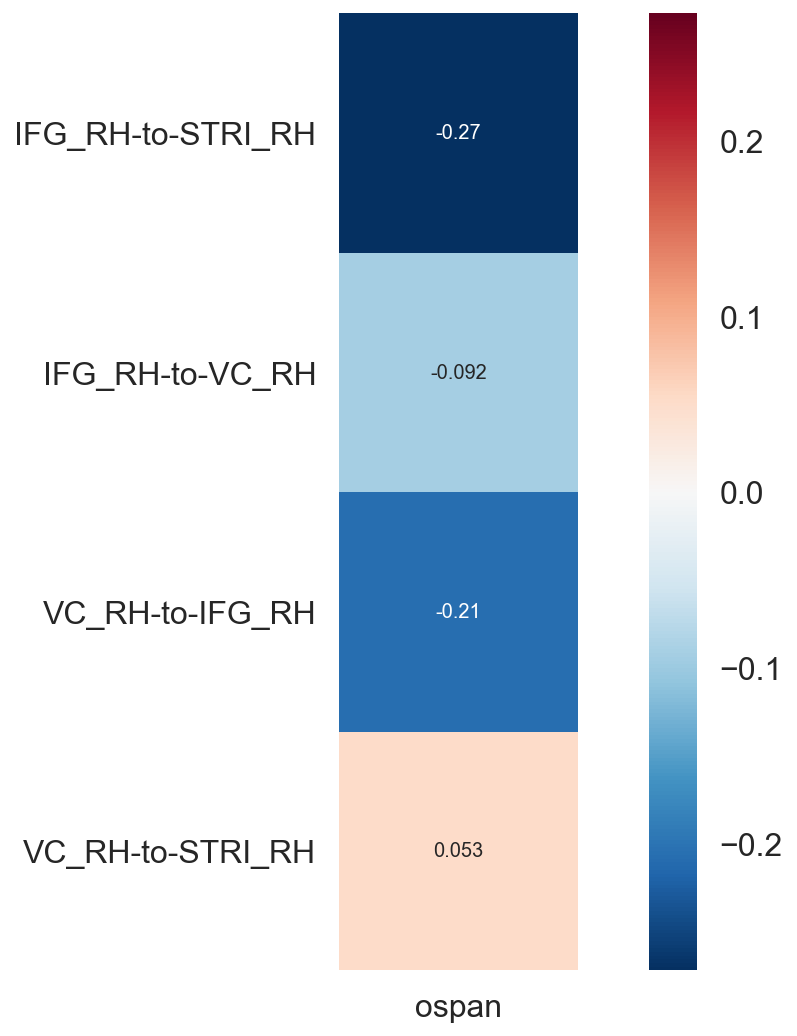

In [130]:
ax = sns.heatmap(a.merge(wmc).corr().iloc[1:5, -1:], 
                 annot=True, 
                 annot_kws={'size':10},
                 square=True)

In [149]:
df1 = a.merge(wmc).iloc[:, 1:5]
df2 = a.merge(wmc).iloc[:, 5:]

coeffmat = np.zeros((df1.shape[1], df2.shape[1]))
pvalmat = np.zeros((df1.shape[1], df2.shape[1]))

for i in range(df1.shape[1]):    
    for j in range(df2.shape[1]):        
        corrtest = pearsonr(df1[df1.columns[i]], df2[df2.columns[j]])  

        coeffmat[i,j] = corrtest[0]
        pvalmat[i,j] = corrtest[1]

dfCoeff = pd.DataFrame(coeffmat, columns=df2.columns, index=df1.columns)
dfPvals = pd.DataFrame(pvalmat, columns=df2.columns, index=df1.columns)

In [150]:
print('\nTable of Correlation Coefficients:')
dfCoeff

print('\nTable of p-values for Correlations:')
dfPvals


Table of Correlation Coefficients:


,ospan
IFG_RH-to-STRI_RH,-0.272392
IFG_RH-to-VC_RH,-0.092408
VC_RH-to-IFG_RH,-0.207307
VC_RH-to-STRI_RH,0.052655



Table of p-values for Correlations:


,ospan
IFG_RH-to-STRI_RH,0.113405
IFG_RH-to-VC_RH,0.597520
VC_RH-to-IFG_RH,0.232110
VC_RH-to-STRI_RH,0.763866


#### Interim Summary:
Intrinsic connectivity parameters do not significantly predict WMC.

<a id="2"></a>
### (1.2) DCM Matrix D: Modulatory effects of regions on connections

In [151]:
df1 = d.merge(wmc).iloc[:, 1:2]
df2 = d.merge(wmc).iloc[:, 2:]

coeffmat = np.zeros((df1.shape[1], df2.shape[1]))
pvalmat = np.zeros((df1.shape[1], df2.shape[1]))

for i in range(df1.shape[1]):    
    for j in range(df2.shape[1]):        
        corrtest = pearsonr(df1[df1.columns[i]], df2[df2.columns[j]])  

        coeffmat[i,j] = corrtest[0]
        pvalmat[i,j] = corrtest[1]

dfCoeff = pd.DataFrame(coeffmat, columns=df2.columns, index=df1.columns)
dfPvals = pd.DataFrame(pvalmat, columns=df2.columns, index=df1.columns)

In [152]:
print('\nTable of Correlation Coefficients:')
dfCoeff

print('\nTable of p-values for Correlations:')
dfPvals


Table of Correlation Coefficients:


,ospan
VC_RH-to-IFG_RH-by-STRI_RH,0.281293



Table of p-values for Correlations:


,ospan
VC_RH-to-IFG_RH-by-STRI_RH,0.101639


#### Interim Summary:
Modulation of V1 signalign to IFG by the Striatum does not significantly predict WMC.

<a id="3"></a>
### (1.3) DCM Matrix C: Effects of Drives on Regions

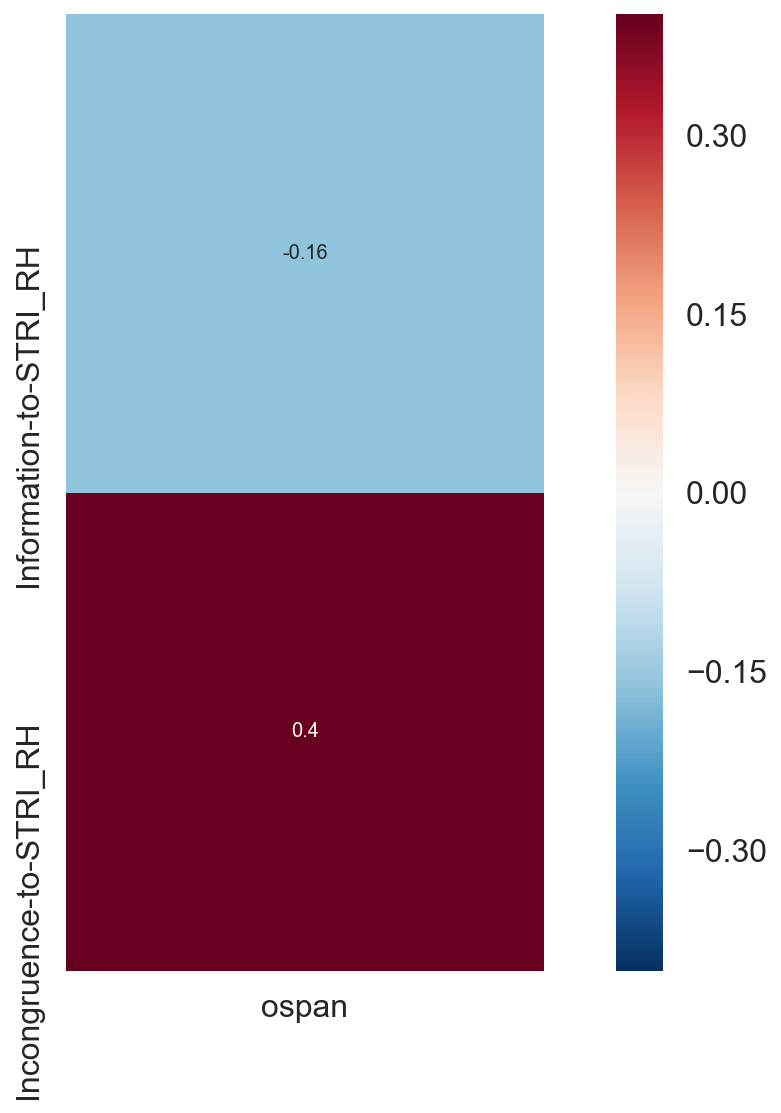

In [172]:
ax = sns.heatmap(c.merge(wmc).corr().iloc[3:5, -1:], 
                 annot=True, 
                 annot_kws={'size':10}, 
                 square=True)

In [159]:
df1 = c.merge(wmc).iloc[:, 3:5]
df2 = c.merge(wmc).iloc[:, 5:]

coeffmat = np.zeros((df1.shape[1], df2.shape[1]))
pvalmat = np.zeros((df1.shape[1], df2.shape[1]))

for i in range(df1.shape[1]):    
    for j in range(df2.shape[1]):        
        corrtest = pearsonr(df1[df1.columns[i]], df2[df2.columns[j]])  

        coeffmat[i,j] = corrtest[0]
        pvalmat[i,j] = corrtest[1]

dfCoeff = pd.DataFrame(coeffmat, columns=df2.columns, index=df1.columns)
dfPvals = pd.DataFrame(pvalmat, columns=df2.columns, index=df1.columns)

print('\nTable of Correlation Coefficients:')
dfCoeff

print('\nTable of p-values for Correlations:')
dfPvals


Table of Correlation Coefficients:


,ospan
Information-to-STRI_RH,-0.163081
Incongruence-to-STRI_RH,0.401722



Table of p-values for Correlations:


,ospan
Information-to-STRI_RH,0.349247
Incongruence-to-STRI_RH,0.016754


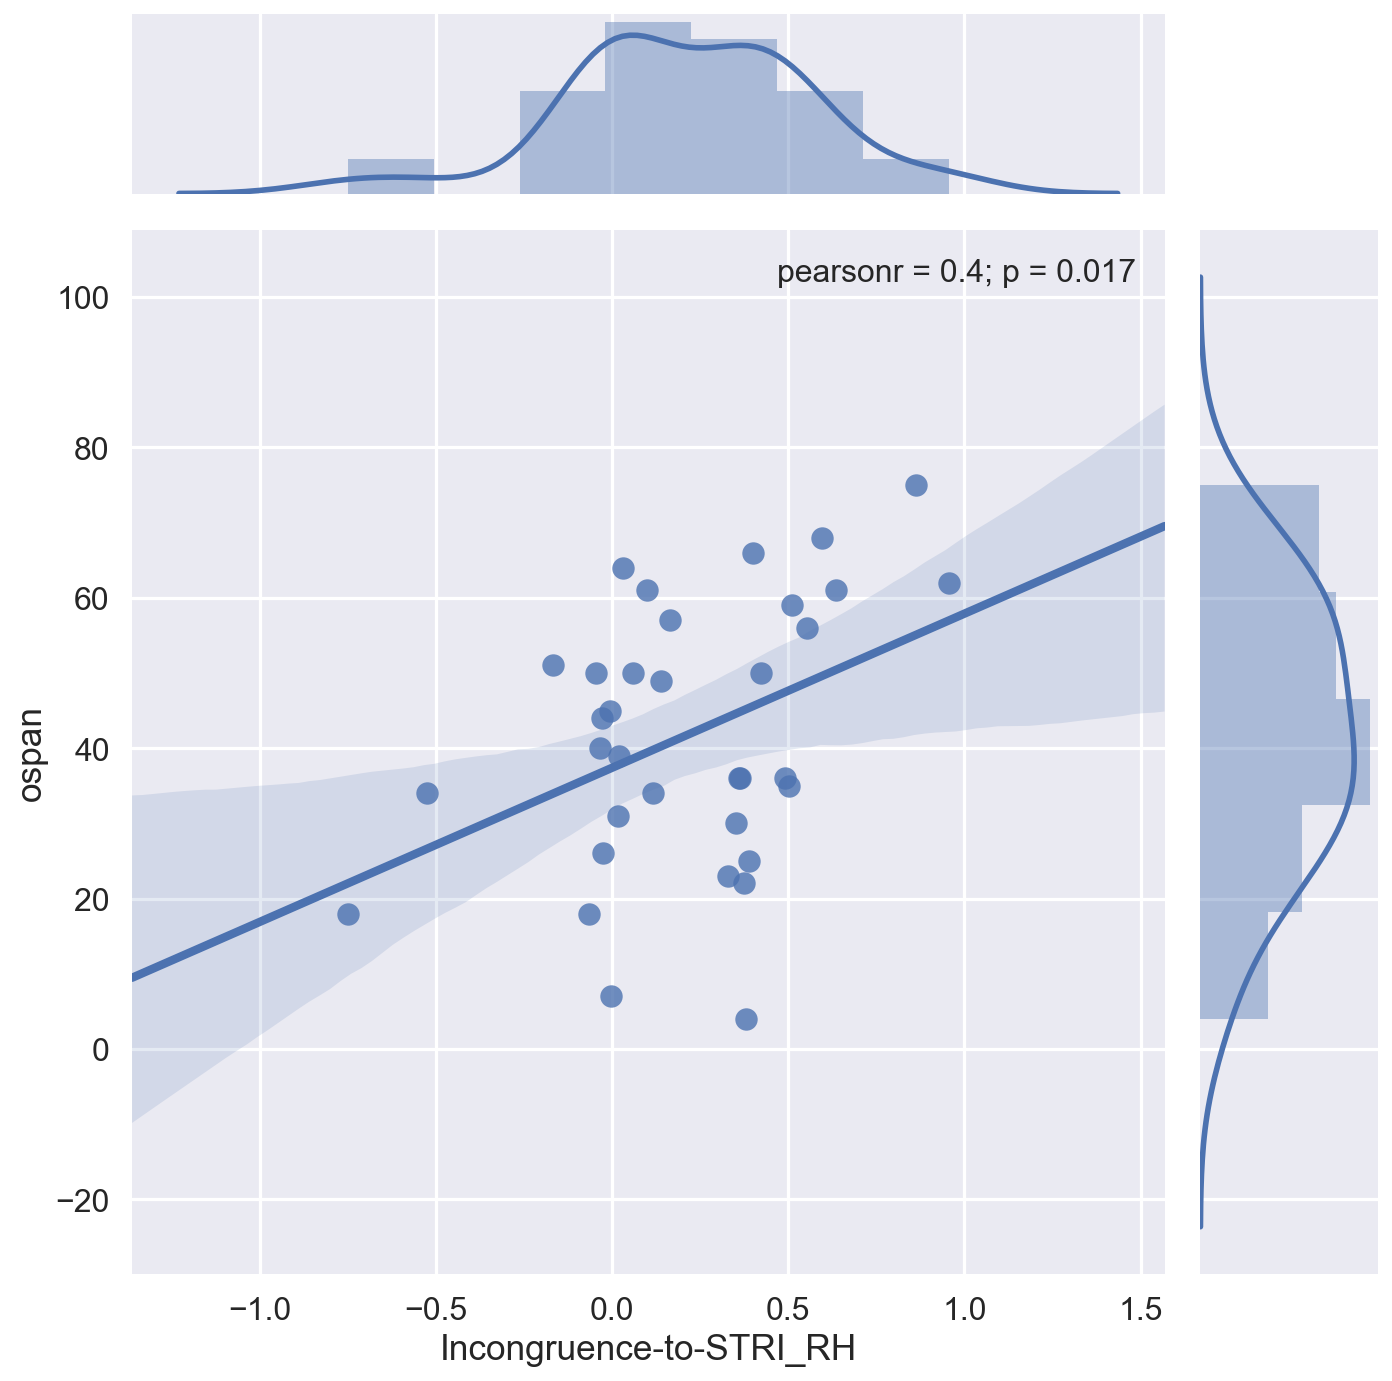

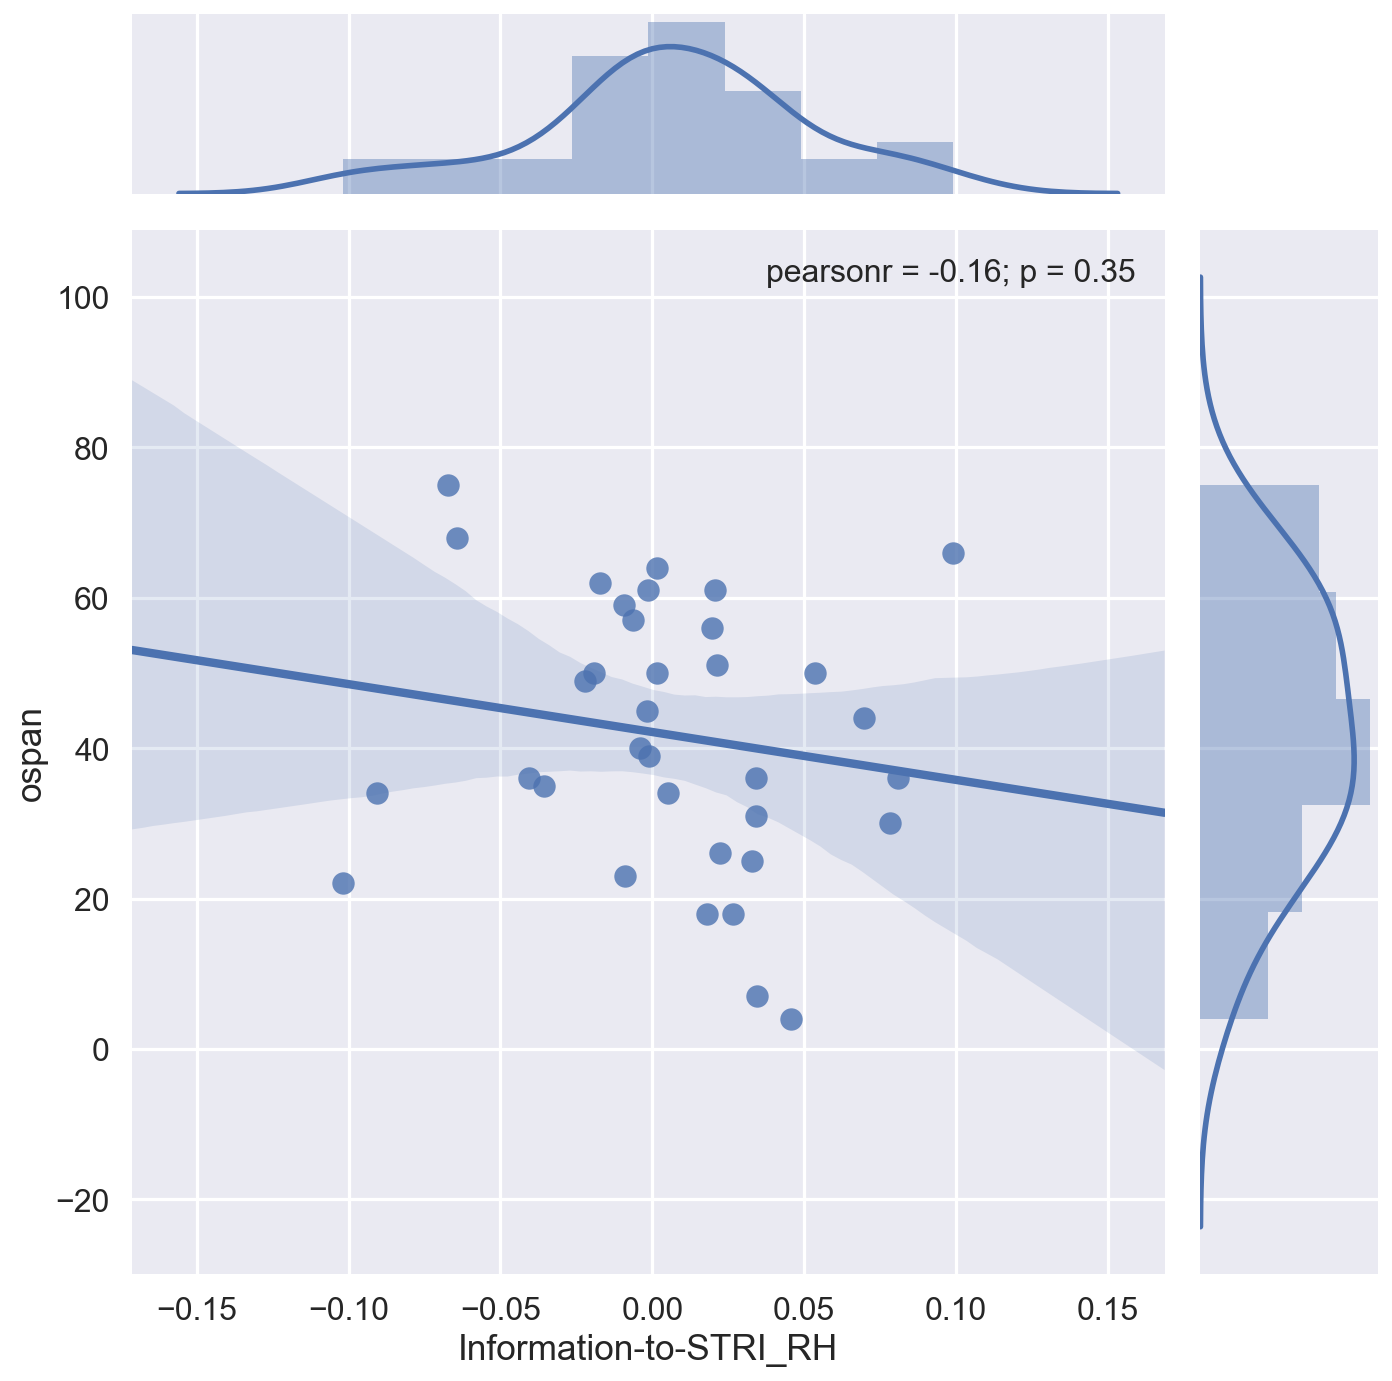

In [170]:
sns.jointplot(x='Incongruence-to-STRI_RH', 
              y='ospan', 
              data=c.merge(wmc), 
              kind='reg', 
              size=10);

sns.jointplot(x='Information-to-STRI_RH', 
              y='ospan', 
              data=c.merge(wmc), 
              kind='reg', 
              size=10);

#### Interim Summary:
The effects of incongruence (i.e., incongruent proactive OR reactive arrows) signifinantly predict WMC (pearsonr = 0.4, p = 0.017).

<a id="4"></a>
### WMC Section Summary:
<div class="alert alert-block alert-info">

The striatum's response to incongruent arrows, irrespective of control type, positively predicted WMC. Note how the striatum's response to 'Information' (cue info maintenance, from cue onset to arrow response during proactive control) did not significantly predict WMC.

</div>

_____

# (2) Behavior
<a id="5"></a>
### (2.1) DCM Matrix A: Intrinsic Connectivity

Looking at congruency effects across conditions, and relationship with 

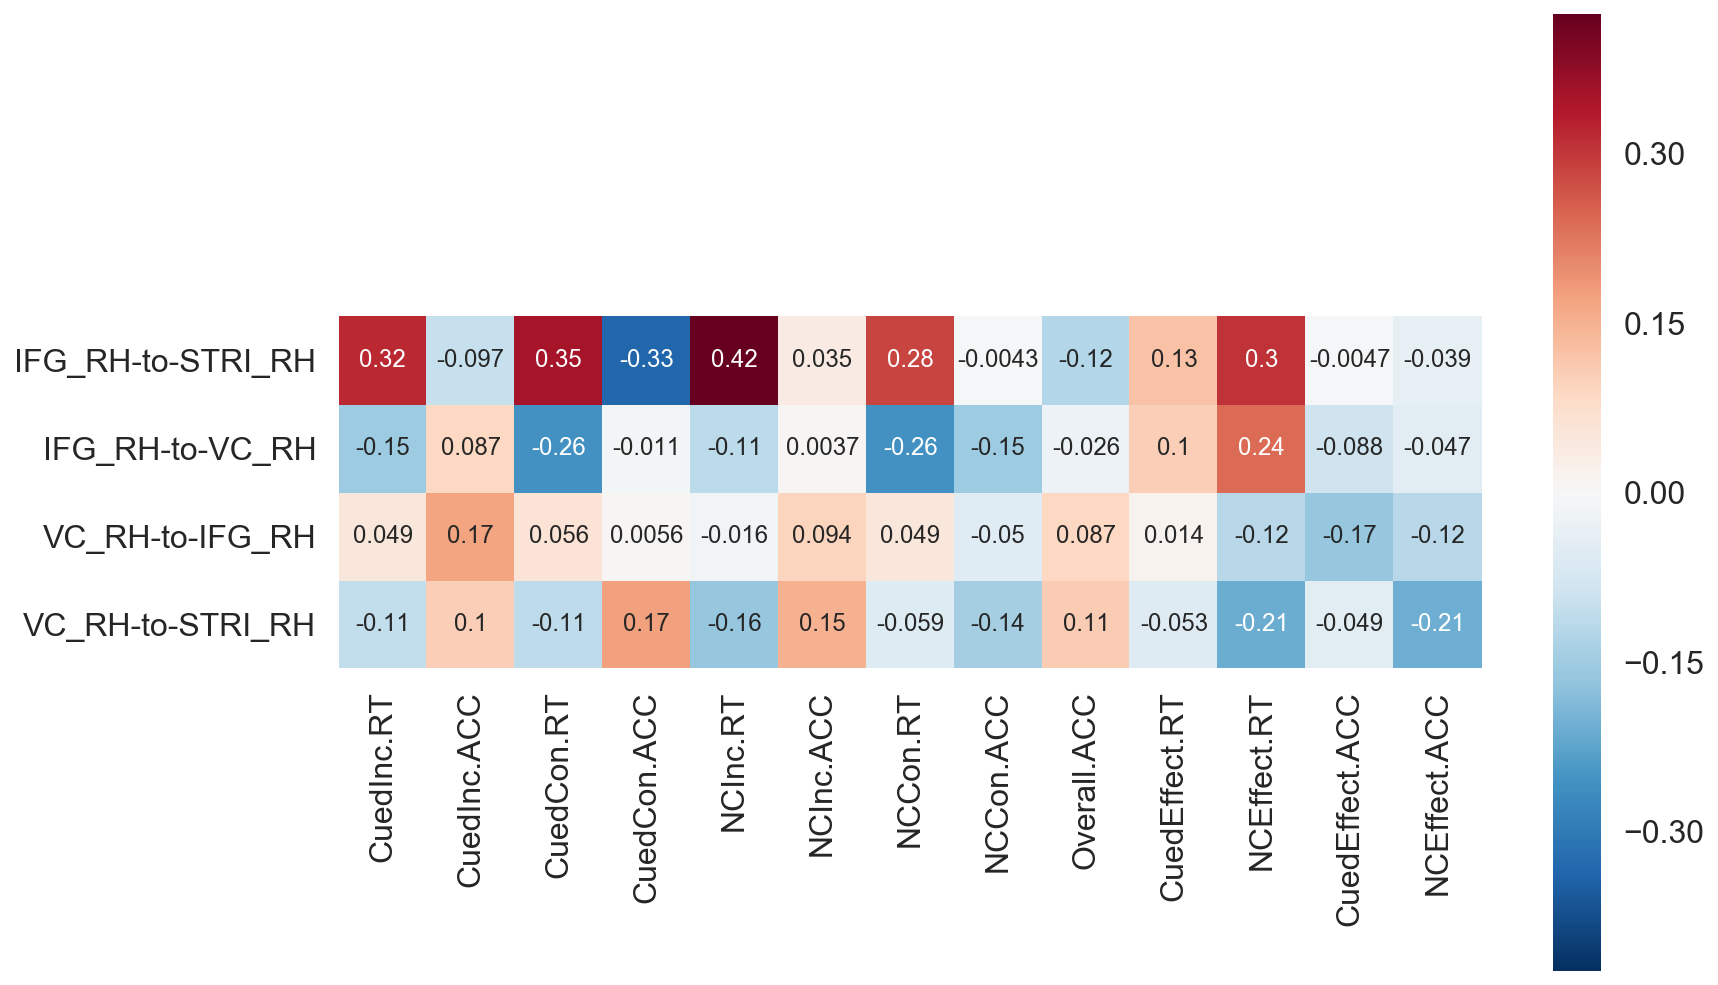

In [135]:
sns.heatmap(a.merge(bx).corr().iloc[1:5, 5:], 
                 annot=True, 
                 annot_kws={'size':12},
                 square=True);

In [136]:
df1 = a.merge(bx).iloc[:, 1:5]
df2 = a.merge(bx).iloc[:, 5:]

coeffmat = np.zeros((df1.shape[1], df2.shape[1]))
pvalmat = np.zeros((df1.shape[1], df2.shape[1]))

for i in range(df1.shape[1]):    
    for j in range(df2.shape[1]):        
        corrtest = pearsonr(df1[df1.columns[i]], df2[df2.columns[j]])  

        coeffmat[i,j] = corrtest[0]
        pvalmat[i,j] = corrtest[1]

dfCoeff = pd.DataFrame(coeffmat, columns=df2.columns, index=df1.columns)
dfPvals = pd.DataFrame(pvalmat, columns=df2.columns, index=df1.columns)

In [137]:
print('\nTable of Correlation Coefficients:')
dfCoeff

print('\nTable of p-values for Correlations:')
dfPvals


Table of Correlation Coefficients:


,CuedInc.RT,CuedInc.ACC,CuedCon.RT,CuedCon.ACC,NCInc.RT,NCInc.ACC,NCCon.RT,NCCon.ACC,Overall.ACC,CuedEffect.RT,NCEffect.RT,CuedEffect.ACC,NCEffect.ACC
IFG_RH-to-STRI_RH,0.319654,-0.096721,0.352099,-0.334811,0.423421,0.034520,0.284609,-0.004338,-0.124201,0.125061,0.304986,-0.004745,-0.039466
IFG_RH-to-VC_RH,-0.154275,0.086975,-0.255519,-0.011055,-0.114187,0.003663,-0.257045,-0.153983,-0.025622,0.102812,0.239213,-0.087587,-0.047292
VC_RH-to-IFG_RH,0.048743,0.171950,0.056461,0.005597,-0.016378,0.094070,0.048643,-0.050153,0.086823,0.013786,-0.118156,-0.165082,-0.118311
VC_RH-to-STRI_RH,-0.105798,0.102704,-0.110191,0.173275,-0.163489,0.150050,-0.058559,-0.142353,0.109119,-0.053488,-0.209285,-0.048594,-0.206223



Table of p-values for Correlations:


,CuedInc.RT,CuedInc.ACC,CuedCon.RT,CuedCon.ACC,NCInc.RT,NCInc.ACC,NCCon.RT,NCCon.ACC,Overall.ACC,CuedEffect.RT,NCEffect.RT,CuedEffect.ACC,NCEffect.ACC
IFG_RH-to-STRI_RH,0.050427,0.563489,0.030164,0.039909,0.008077,0.836985,0.083298,0.979381,0.457520,0.454390,0.062619,0.977445,0.814014
IFG_RH-to-VC_RH,0.355070,0.603604,0.121540,0.947481,0.494848,0.982588,0.119256,0.355991,0.878642,0.539059,0.148053,0.601048,0.777982
VC_RH-to-IFG_RH,0.771353,0.301943,0.736348,0.973396,0.922252,0.574277,0.771809,0.764920,0.604237,0.934527,0.479869,0.321951,0.479291
VC_RH-to-STRI_RH,0.527275,0.539487,0.510162,0.298175,0.326709,0.368558,0.726923,0.393901,0.514314,0.749775,0.207294,0.772032,0.214169




Reactive control RT & IFG-to-STRI


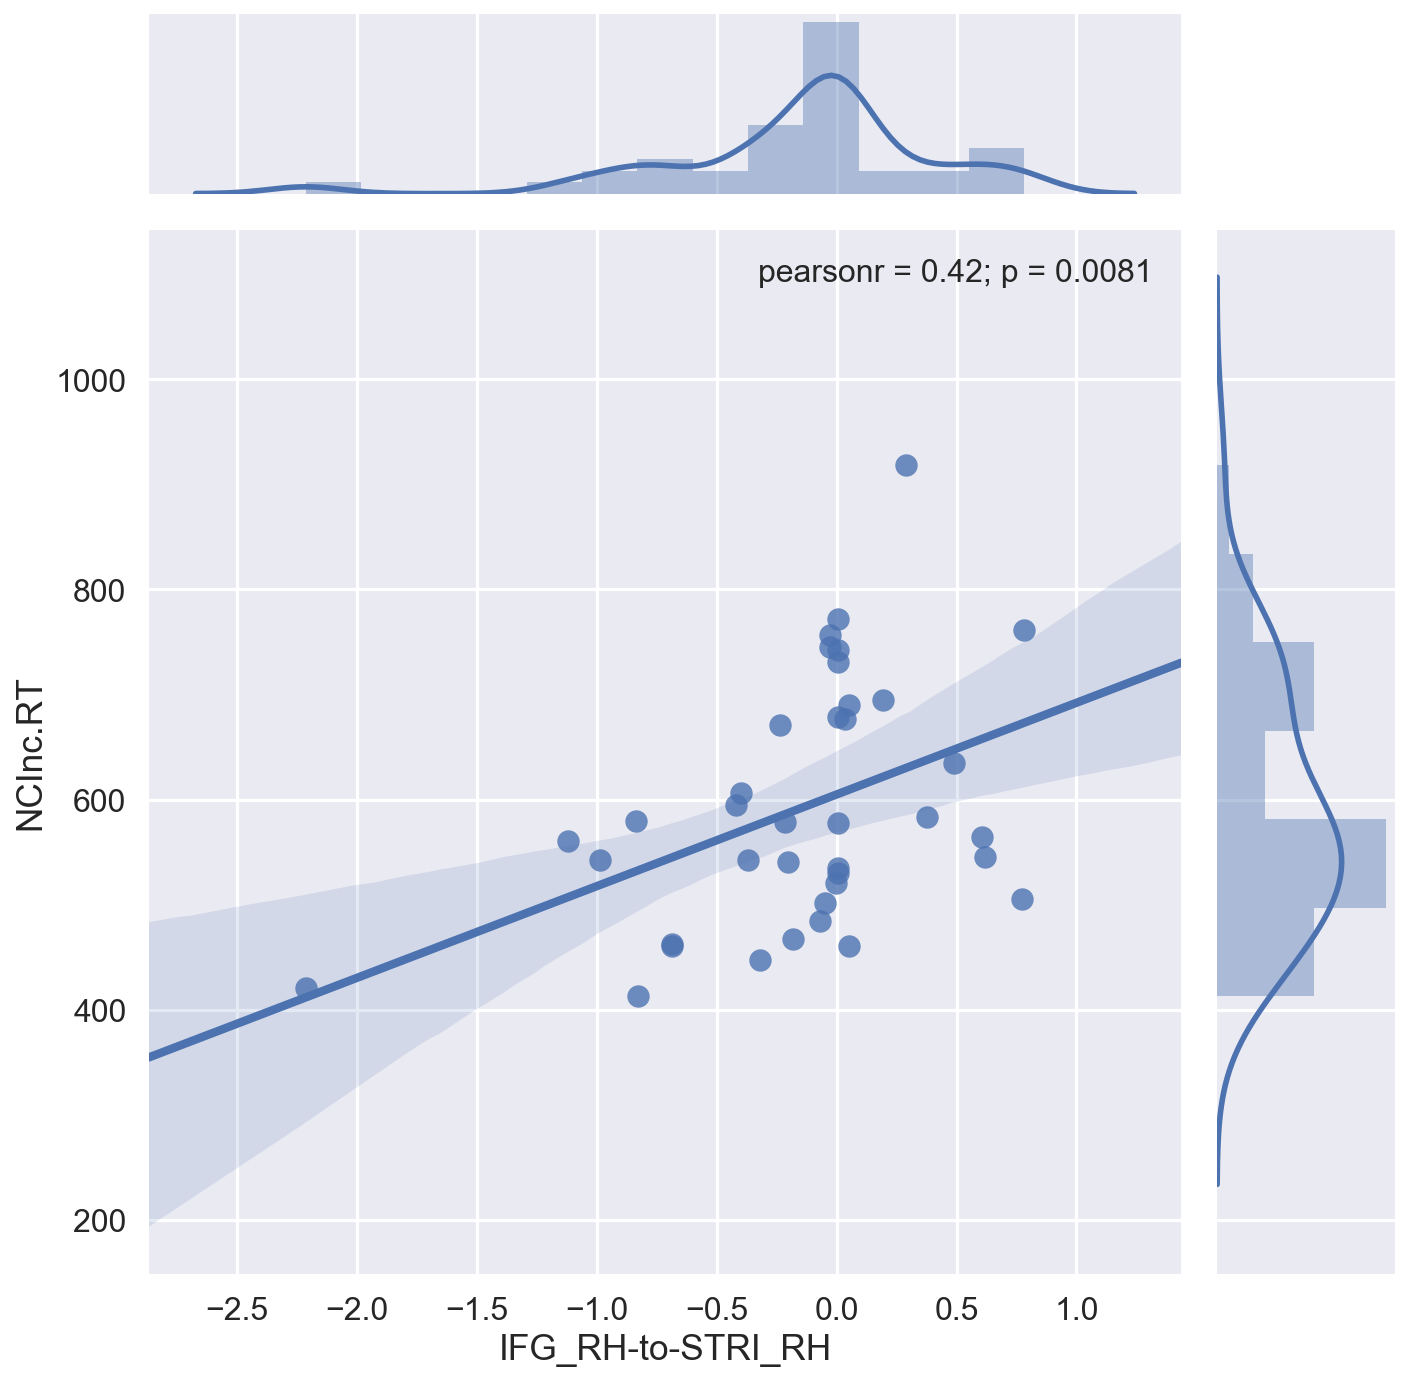

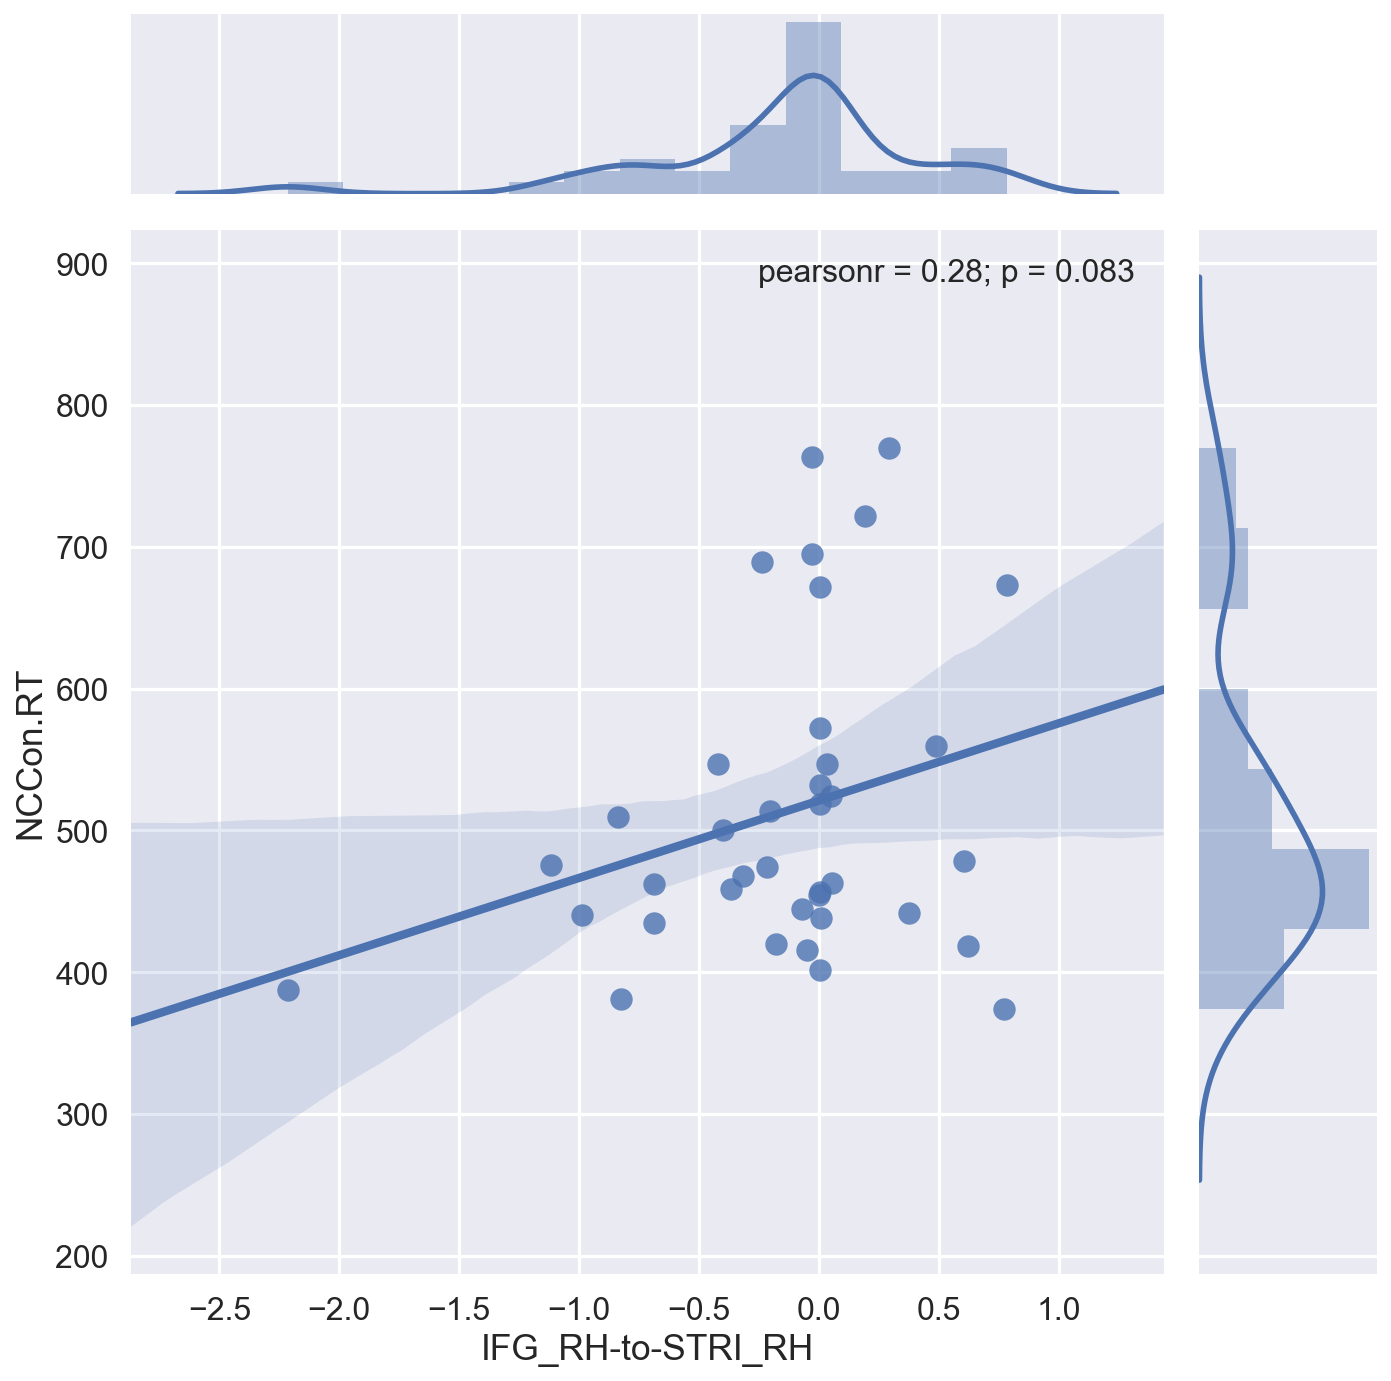

In [138]:
print('\n\nReactive control RT & IFG-to-STRI')
sns.jointplot(x='IFG_RH-to-STRI_RH', 
              y='NCInc.RT', 
              data=a.merge(bx), 
              kind='reg', 
              size=10);

sns.jointplot(x='IFG_RH-to-STRI_RH', 
              y='NCCon.RT', 
              data=a.merge(bx), 
              kind='reg', 
              size=10);



Proactive control RT & IFG-to-STRI


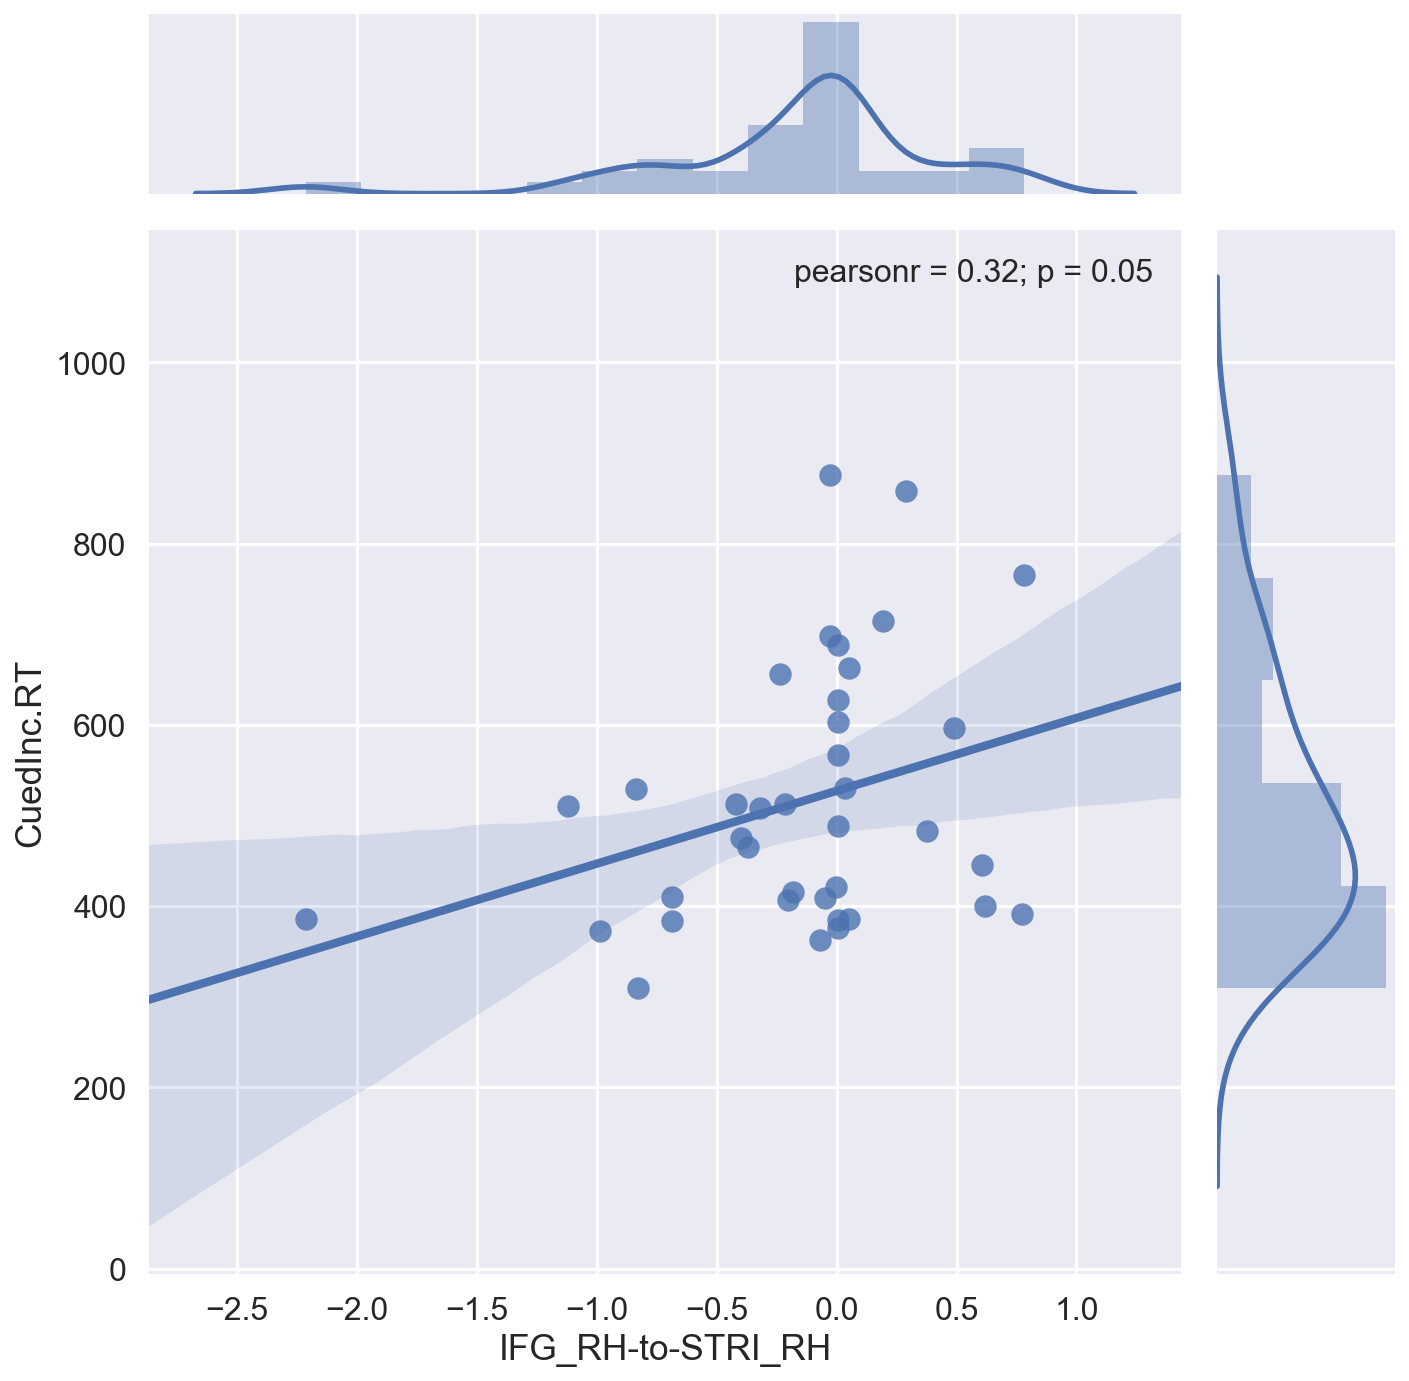

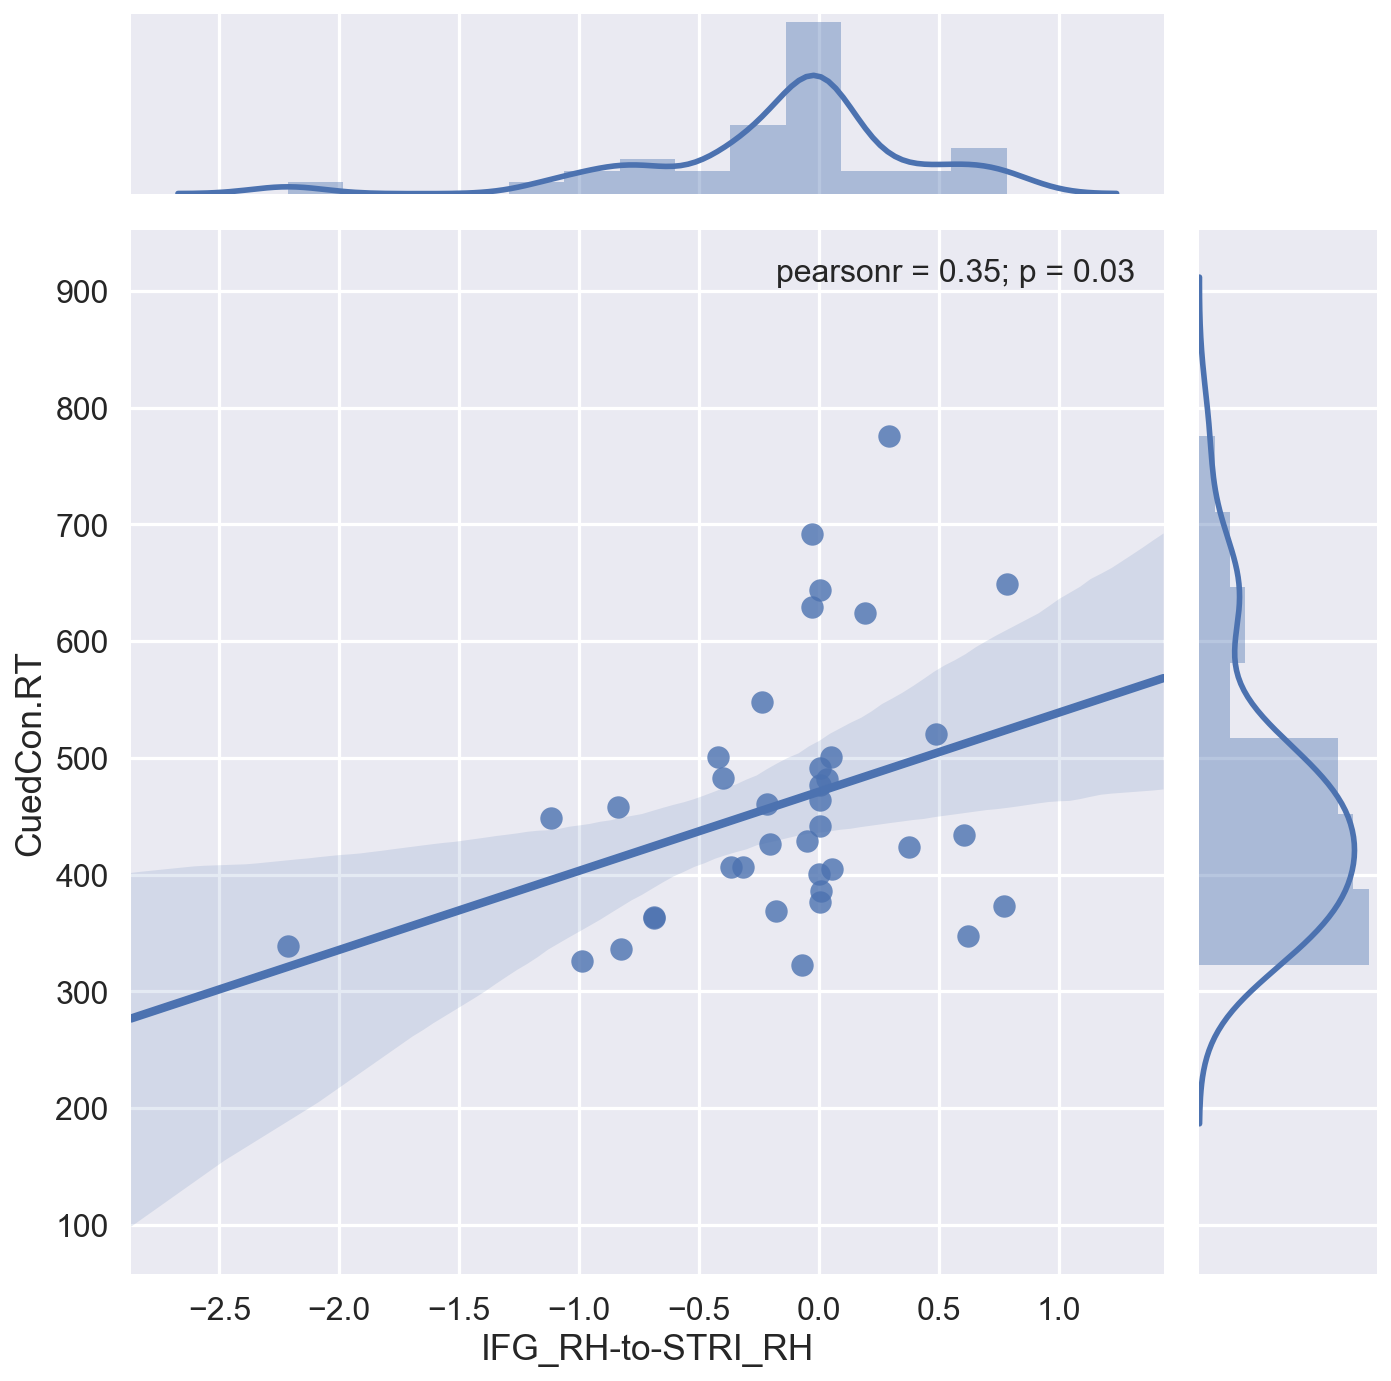

In [139]:
print('\n\nProactive control RT & IFG-to-STRI')
sns.jointplot(x='IFG_RH-to-STRI_RH', 
              y='CuedInc.RT', 
              data=a.merge(bx), 
              kind='reg', 
              size=10);

sns.jointplot(x='IFG_RH-to-STRI_RH', 
              y='CuedCon.RT', 
              data=a.merge(bx), 
              kind='reg', 
              size=10);

#### Interim Summary:
Intrinsic connectivity between IFG-to-STRI signifincantly predicted RTs across all conditions. Greater intrinsic connectivity between the IFG and Striatum is related to slower response times, but not related to better accuracies. Interestingly, greater intrinsic connectivity between the IFG and Striatum is related to lower accuracy in the Proactive Congruent condition, suggesting a speed-accuracy tradeoff in automatic resonses following preparation.

Note: Correlation holds for NCInc.RT even without DCM parameter outlier. Other correlations become marginally signifincaly.

<a id="6"></a>
### (2.2) DCM Matrix D: Modulatory effects of regions on connections

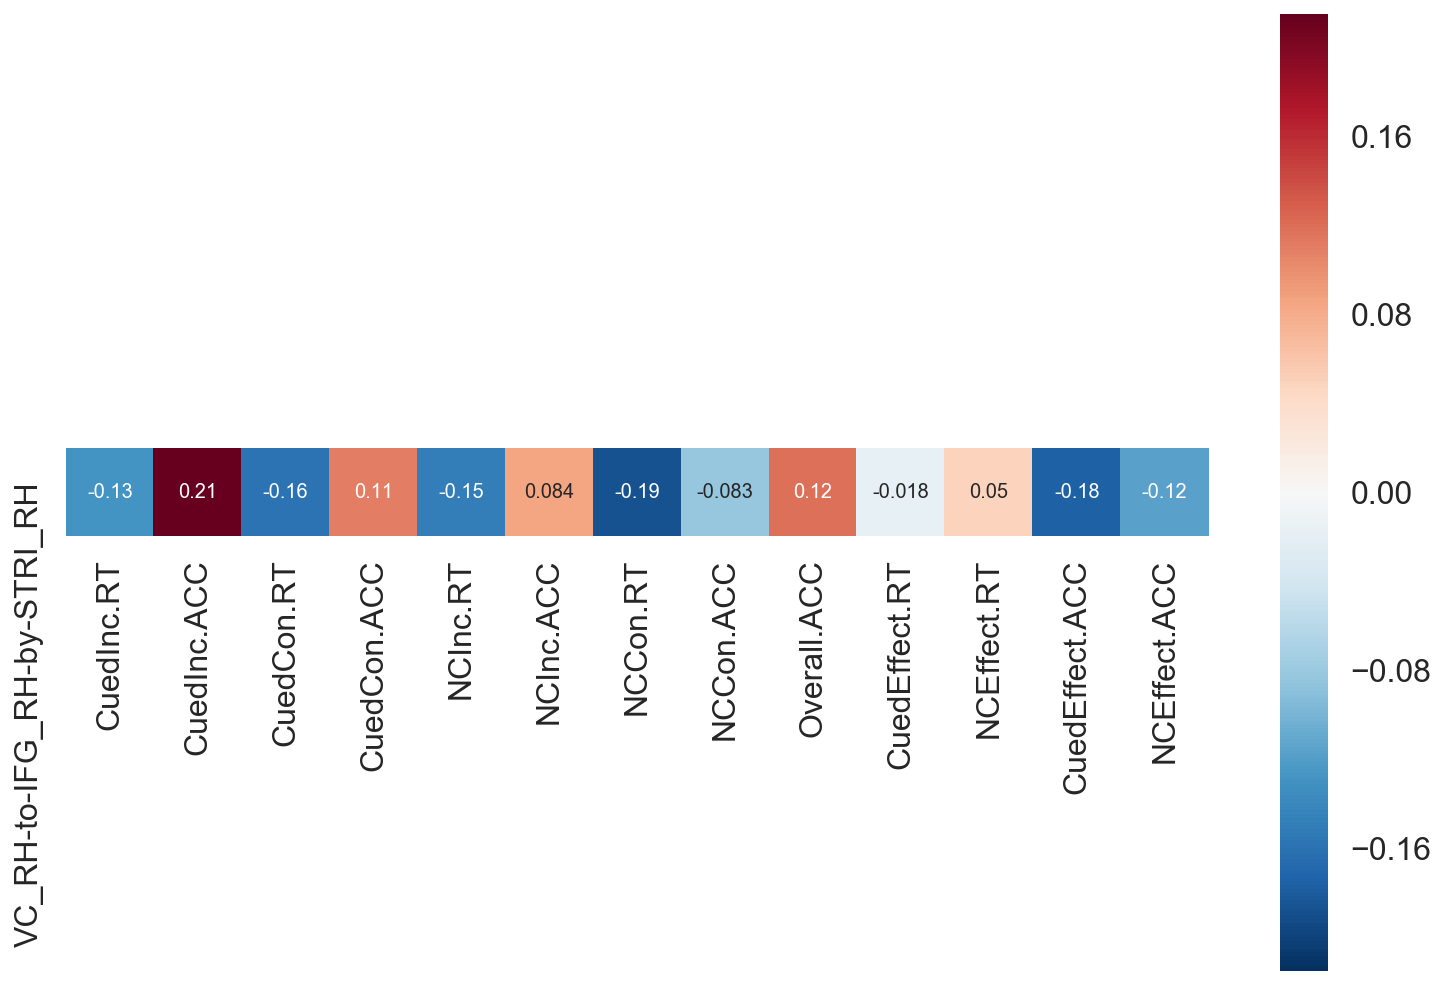

In [155]:
ax = sns.heatmap(d.merge(bx).corr().iloc[1:2, 2:], 
                 annot=True, 
                 annot_kws={'size':10}, 
                 square=True)

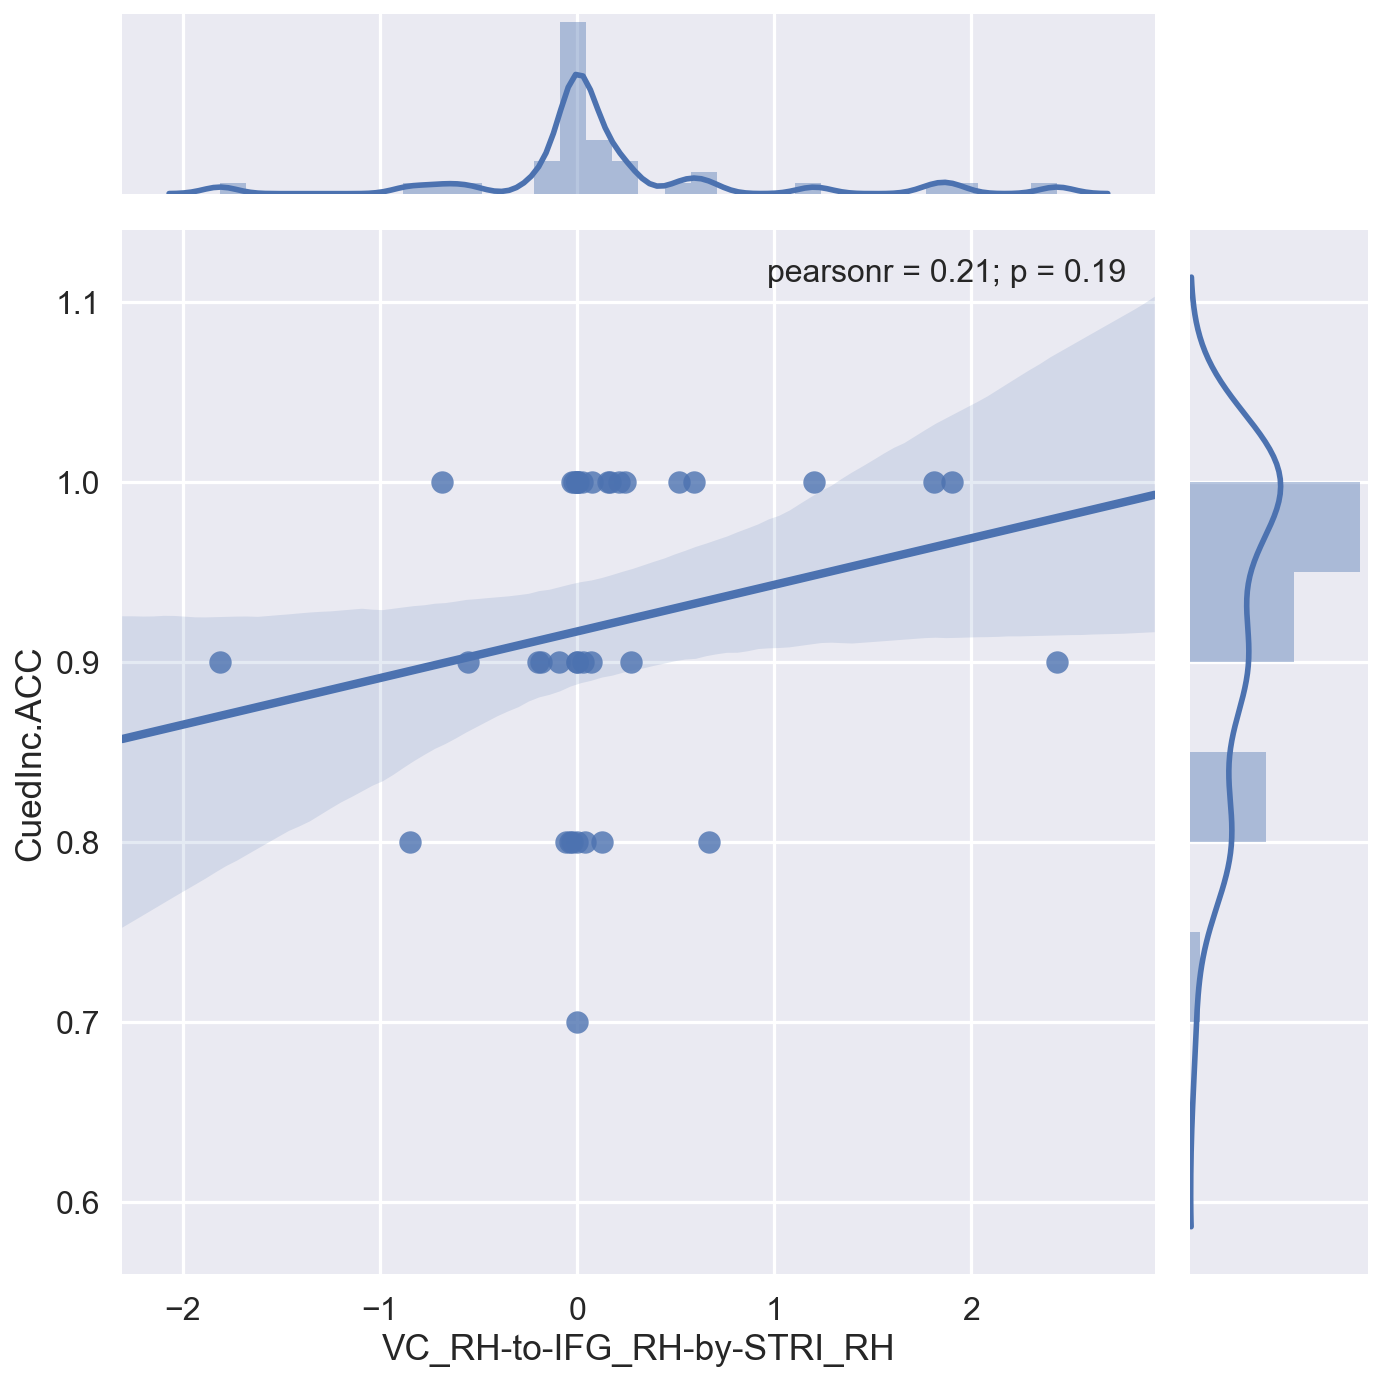

In [141]:
sns.jointplot(x='VC_RH-to-IFG_RH-by-STRI_RH', 
              y='CuedInc.ACC', 
              data=d.merge(bx), 
              kind='reg', 
              size=10);

#### Interim Summary:
VC-to-IFG signal modulation by the Striatum doesn't significantly predict behavioral task measures. However, we see a familiar trend here, where RT is negatively related to this parameter, and ACC is positively related, across most conditions. 

<a id="7"></a>
### (2.3) DCM Matrix C: Effects of Drives on Regions

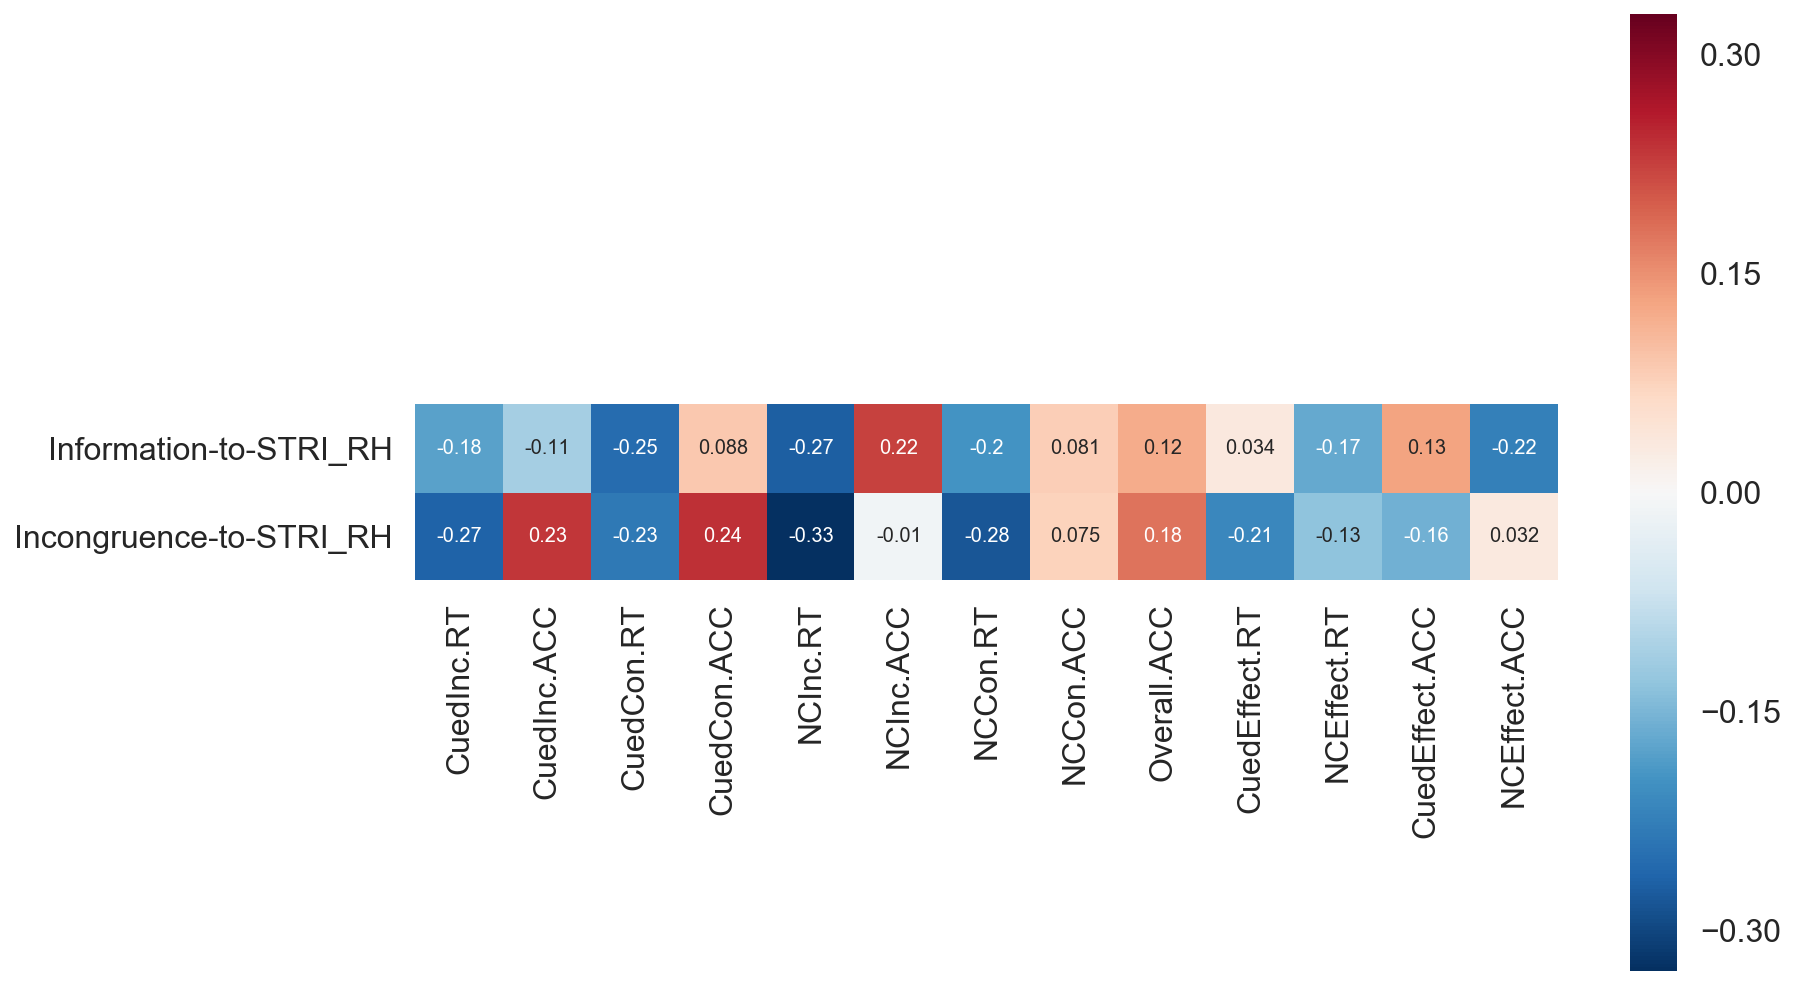

In [157]:
ax = sns.heatmap(c.merge(bx).corr().iloc[3:5, 5:], 
                 annot=True, 
                 annot_kws={'size':10}, 
                 square=True)

In [160]:
df1 = c.merge(bx).iloc[:, 3:5]
df2 = c.merge(bx).iloc[:, 5:]

coeffmat = np.zeros((df1.shape[1], df2.shape[1]))
pvalmat = np.zeros((df1.shape[1], df2.shape[1]))

for i in range(df1.shape[1]):    
    for j in range(df2.shape[1]):        
        corrtest = pearsonr(df1[df1.columns[i]], df2[df2.columns[j]])  

        coeffmat[i,j] = corrtest[0]
        pvalmat[i,j] = corrtest[1]

dfCoeff = pd.DataFrame(coeffmat, columns=df2.columns, index=df1.columns)
dfPvals = pd.DataFrame(pvalmat, columns=df2.columns, index=df1.columns)

In [161]:
print('\nTable of Correlation Coefficients:')
dfCoeff

print('\nTable of p-values for Correlations:')
dfPvals


Table of Correlation Coefficients:


,CuedInc.RT,CuedInc.ACC,CuedCon.RT,CuedCon.ACC,NCInc.RT,NCInc.ACC,NCCon.RT,NCCon.ACC,Overall.ACC,CuedEffect.RT,NCEffect.RT,CuedEffect.ACC,NCEffect.ACC
Information-to-STRI_RH,-0.179110,-0.110468,-0.251916,0.088248,-0.270751,0.222991,-0.196637,0.081137,0.120549,0.034073,-0.168903,0.133084,-0.224292
Incongruence-to-STRI_RH,-0.265094,0.233889,-0.233795,0.239447,-0.327728,-0.010264,-0.279133,0.074924,0.177412,-0.214685,-0.131137,-0.156322,0.032409



Table of p-values for Correlations:


,CuedInc.RT,CuedInc.ACC,CuedCon.RT,CuedCon.ACC,NCInc.RT,NCInc.ACC,NCCon.RT,NCCon.ACC,Overall.ACC,CuedEffect.RT,NCEffect.RT,CuedEffect.ACC,NCEffect.ACC
Information-to-STRI_RH,0.281947,0.509095,0.127068,0.598294,0.100147,0.178397,0.236708,0.628207,0.470956,0.839071,0.310719,0.425724,0.175812
Incongruence-to-STRI_RH,0.107729,0.157562,0.157735,0.147644,0.044578,0.951233,0.089672,0.654828,0.286609,0.195544,0.432583,0.348643,0.846835


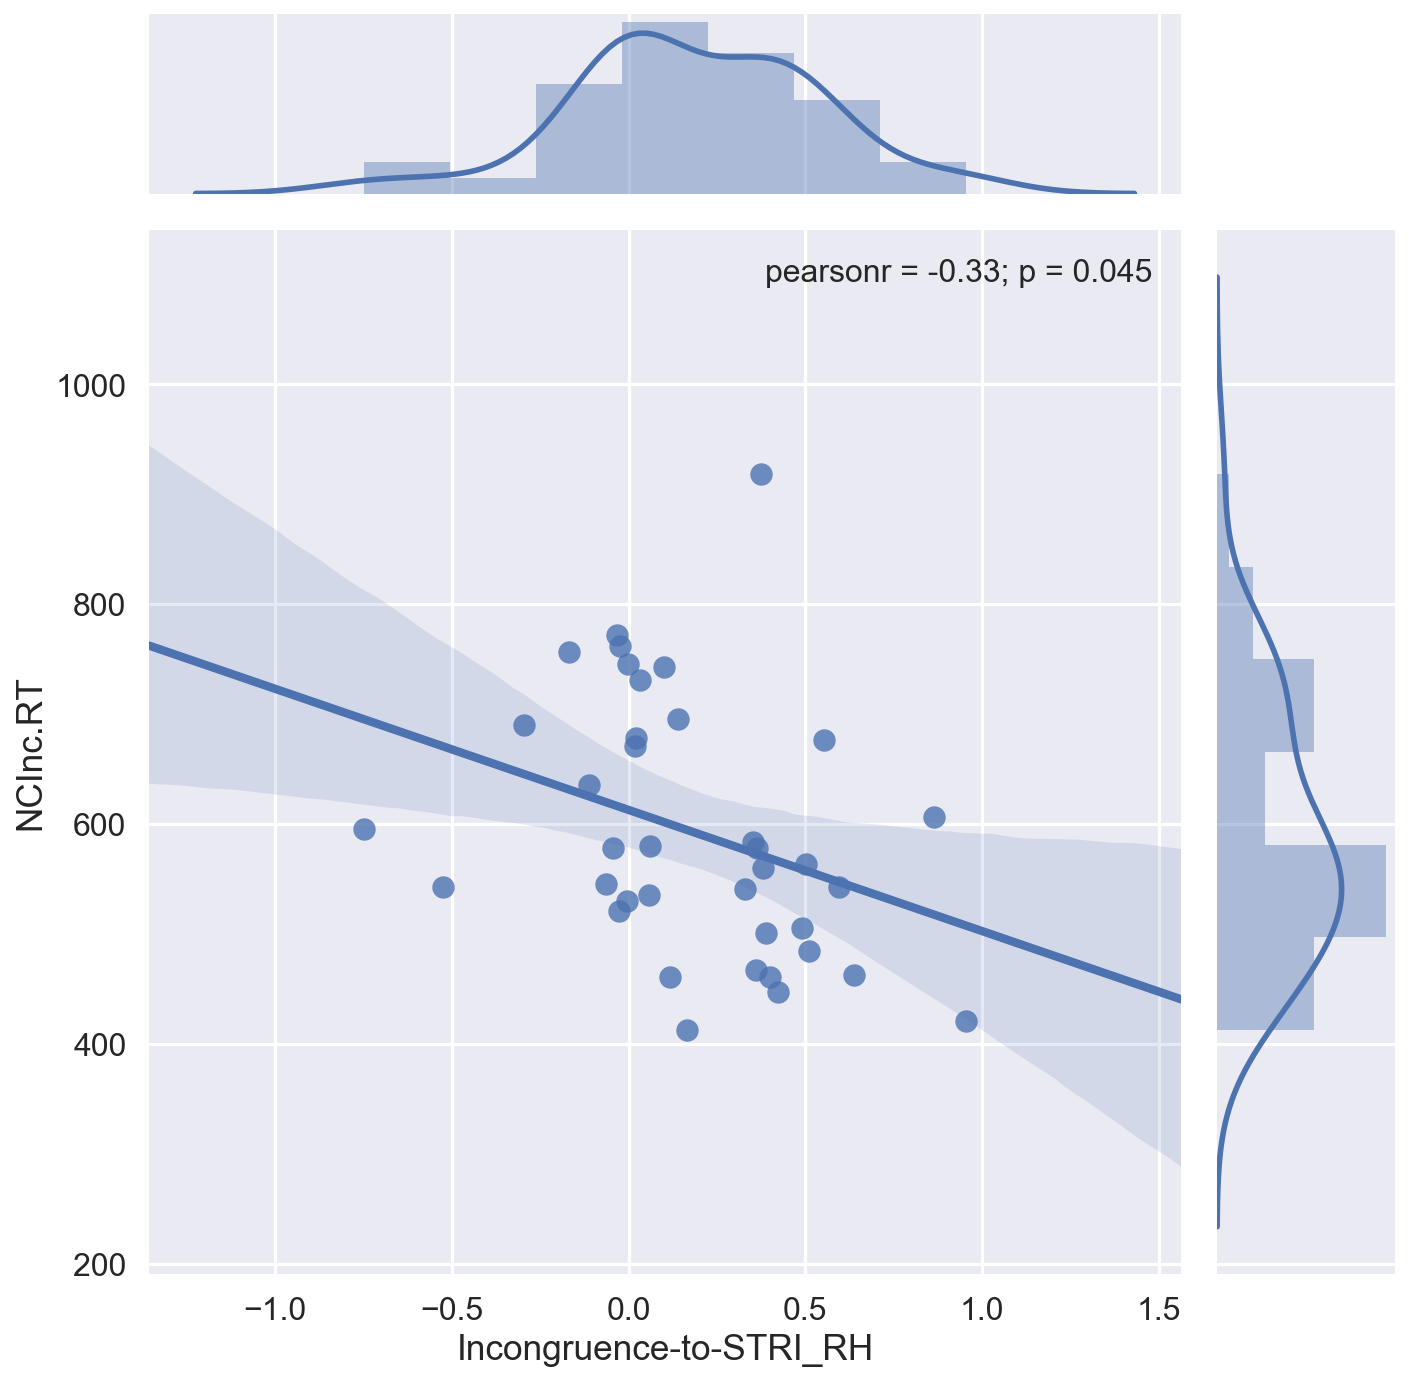

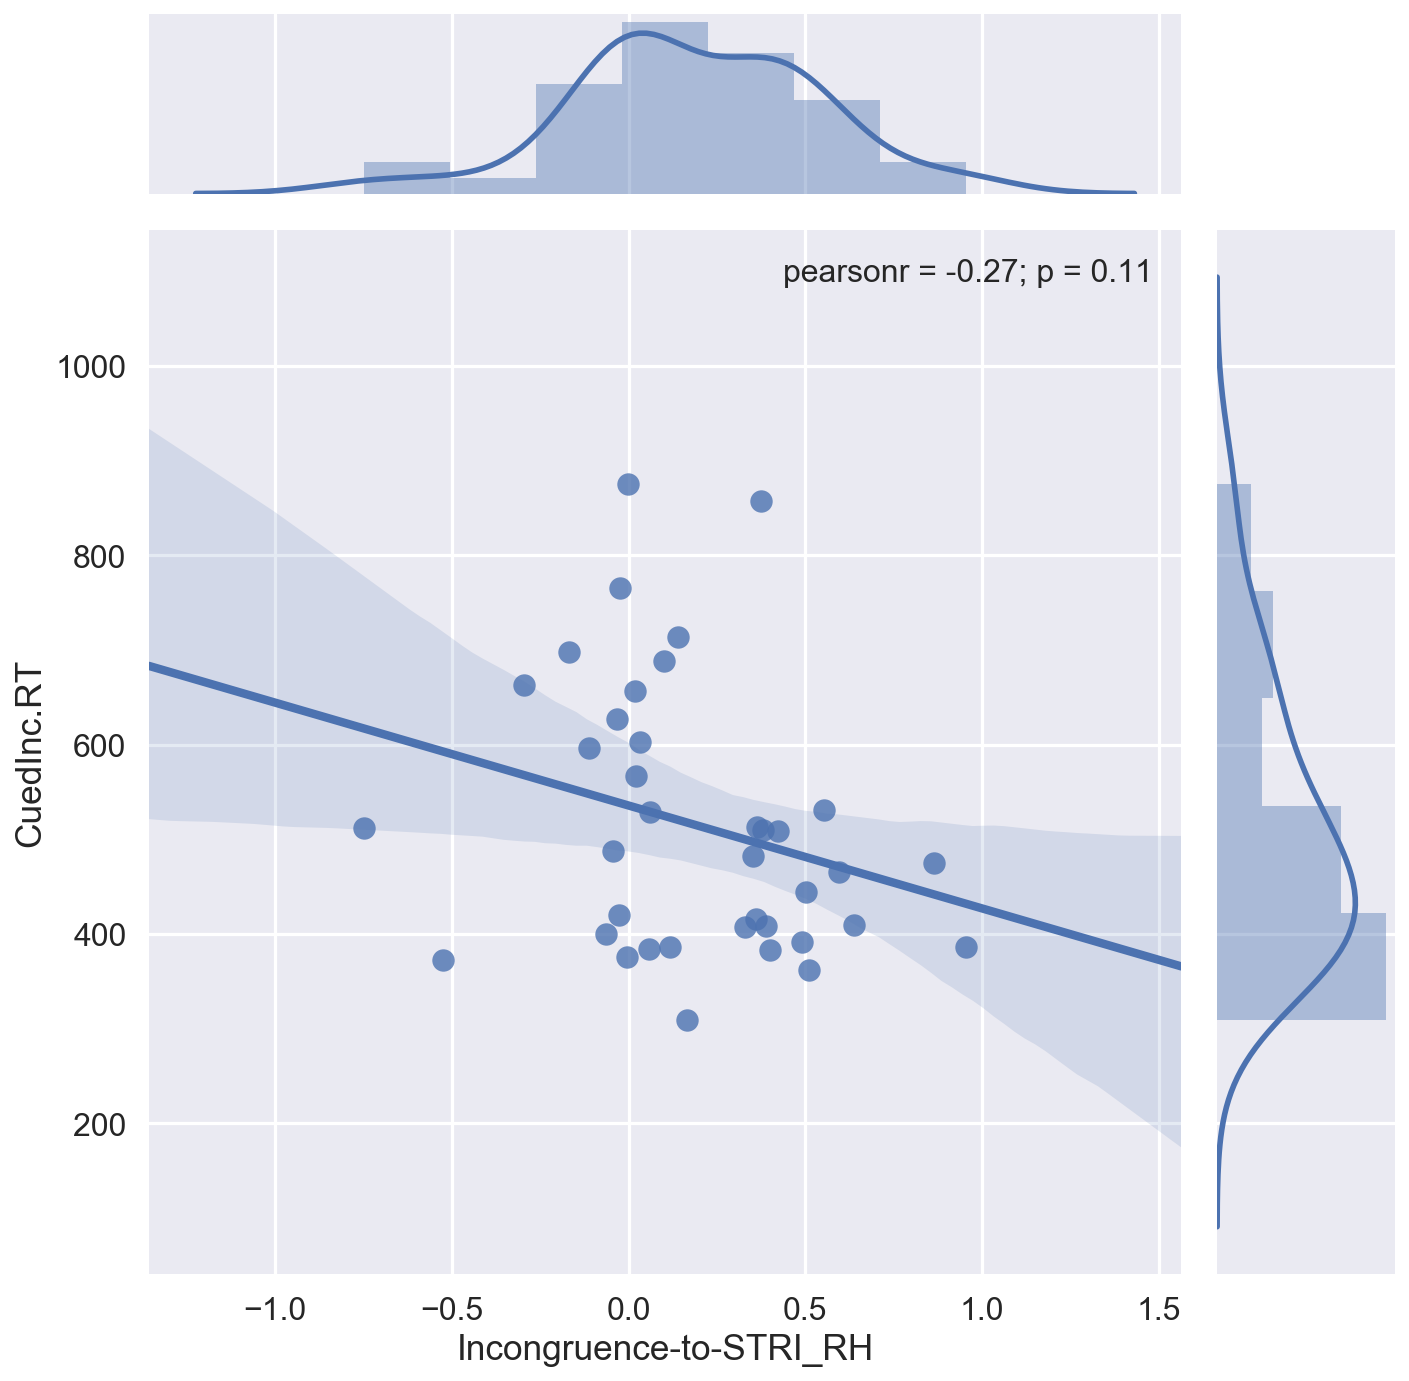

In [143]:
sns.jointplot(x='Incongruence-to-STRI_RH', 
              y='NCInc.RT', 
              data=c.merge(bx), 
              kind='reg', 
              size=10);

sns.jointplot(x='Incongruence-to-STRI_RH', 
              y='CuedInc.RT', 
              data=c.merge(bx), 
              kind='reg', 
              size=10);

#### Interim Summary:
The Striatum's response to 'Incongruence' significantly predicts lower response times to Reactive Incongruent trials (pearsonr = -0.33, p = 0.045), and trends in the same direction for Proactive Incongruent trials.


<a id="8"></a>
### Behavior Section Summary: 
<div class="alert alert-block alert-info">
Blah
</div>

___

# (3) DDM
<a id="9"></a>
### (3.1) DCM Matrix A: Intrinsic Connectivity

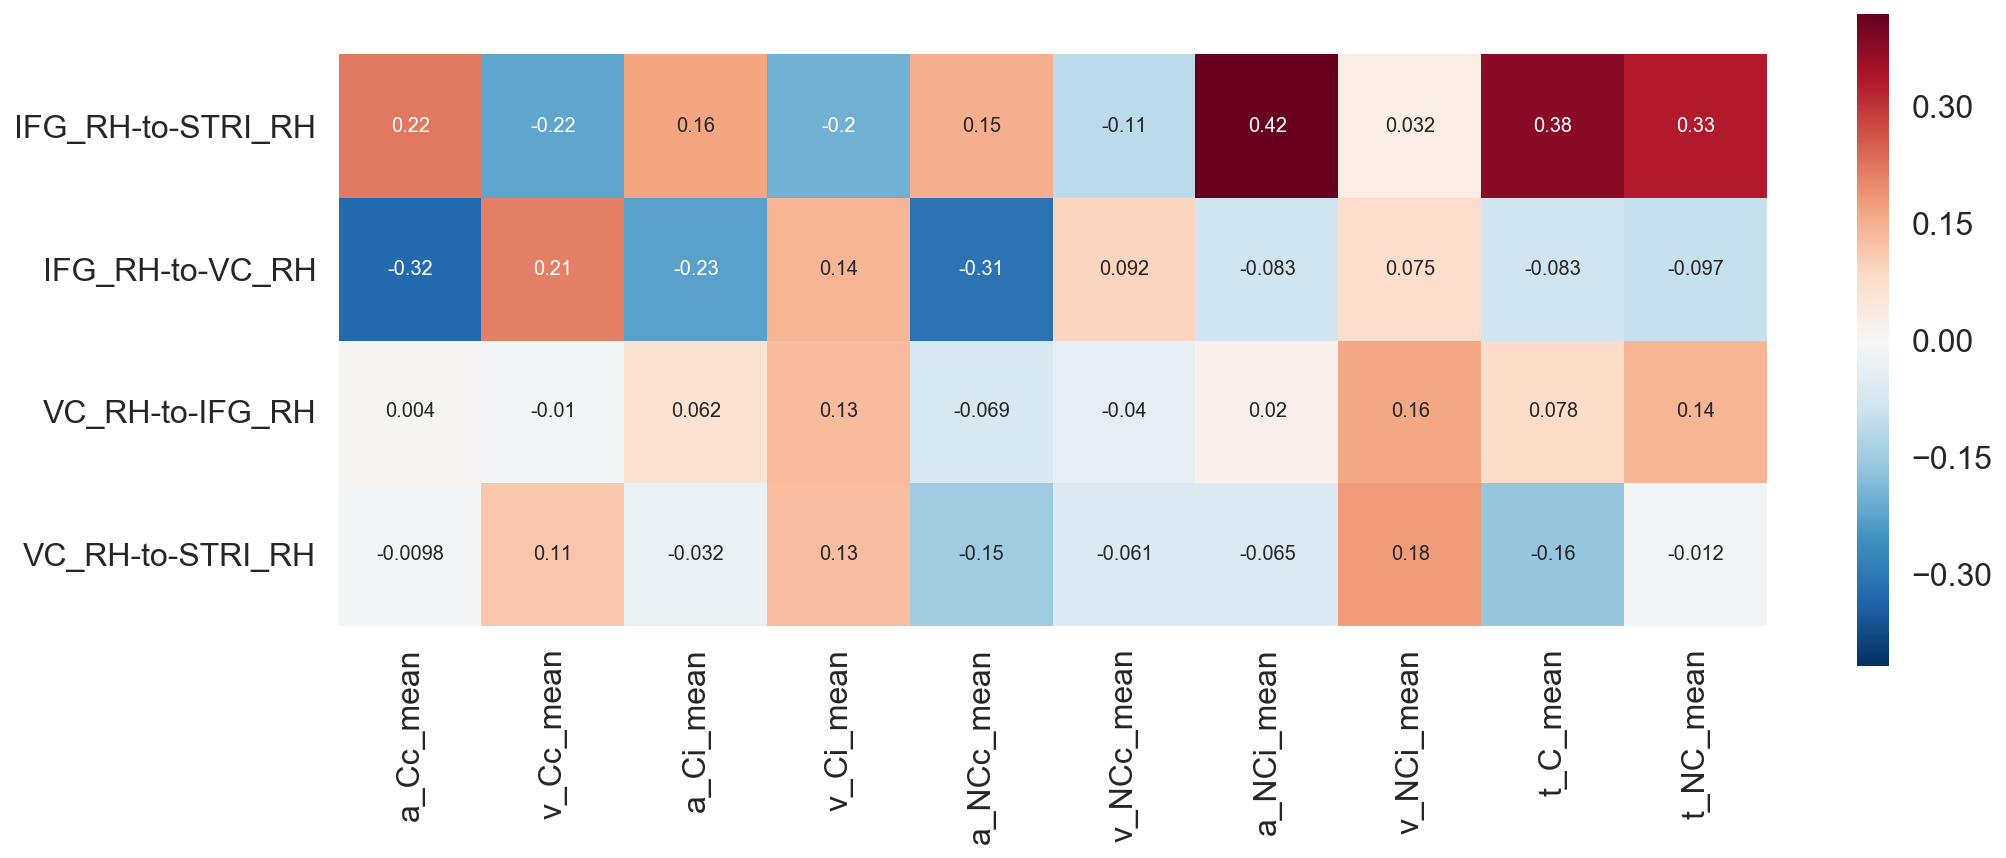

In [162]:
plt.figure(figsize=(16,6))
ax = sns.heatmap(a.merge(ddm).corr().iloc[1:5,5:], 
                 annot=True, 
                 annot_kws={'size':10}, 
                 square=True)

In [163]:
df1 = a.merge(ddm).iloc[:, 1:5]
df2 = a.merge(ddm).iloc[:, 5:]

coeffmat = np.zeros((df1.shape[1], df2.shape[1]))
pvalmat = np.zeros((df1.shape[1], df2.shape[1]))

for i in range(df1.shape[1]):    
    for j in range(df2.shape[1]):        
        corrtest = pearsonr(df1[df1.columns[i]], df2[df2.columns[j]])  

        coeffmat[i,j] = corrtest[0]
        pvalmat[i,j] = corrtest[1]

dfCoeff = pd.DataFrame(coeffmat, columns=df2.columns, index=df1.columns)
dfPvals = pd.DataFrame(pvalmat, columns=df2.columns, index=df1.columns)

In [164]:
print('\nTable of Correlation Coefficients:')
dfCoeff

print('\nTable of p-values for Correlations:')
dfPvals


Table of Correlation Coefficients:


,a_Cc_mean,v_Cc_mean,a_Ci_mean,v_Ci_mean,a_NCc_mean,v_NCc_mean,a_NCi_mean,v_NCi_mean,t_C_mean,t_NC_mean
IFG_RH-to-STRI_RH,0.221926,-0.220602,0.164528,-0.200880,0.151987,-0.111968,0.417813,0.031598,0.377128,0.330329
IFG_RH-to-VC_RH,-0.324475,0.210193,-0.228089,0.143446,-0.306854,0.092386,-0.083362,0.075278,-0.082684,-0.097370
VC_RH-to-IFG_RH,0.004034,-0.010441,0.061805,0.131857,-0.069037,-0.039503,0.019607,0.160209,0.078345,0.143386
VC_RH-to-STRI_RH,-0.009777,0.114994,-0.031802,0.130011,-0.149296,-0.061282,-0.064719,0.178874,-0.161958,-0.012165



Table of p-values for Correlations:


,a_Cc_mean,v_Cc_mean,a_Ci_mean,v_Ci_mean,a_NCc_mean,v_NCc_mean,a_NCi_mean,v_NCi_mean,t_C_mean,t_NC_mean
IFG_RH-to-STRI_RH,0.180534,0.183215,0.323600,0.226541,0.362338,0.503322,0.009051,0.850623,0.019594,0.042814
IFG_RH-to-VC_RH,0.046865,0.205284,0.168419,0.390241,0.060948,0.581180,0.618780,0.653301,0.621646,0.560861
VC_RH-to-IFG_RH,0.980825,0.950390,0.712412,0.430040,0.680452,0.813846,0.906988,0.336638,0.640115,0.390443
VC_RH-to-STRI_RH,0.953543,0.491783,0.849670,0.436581,0.370998,0.714745,0.699471,0.282592,0.331320,0.942215


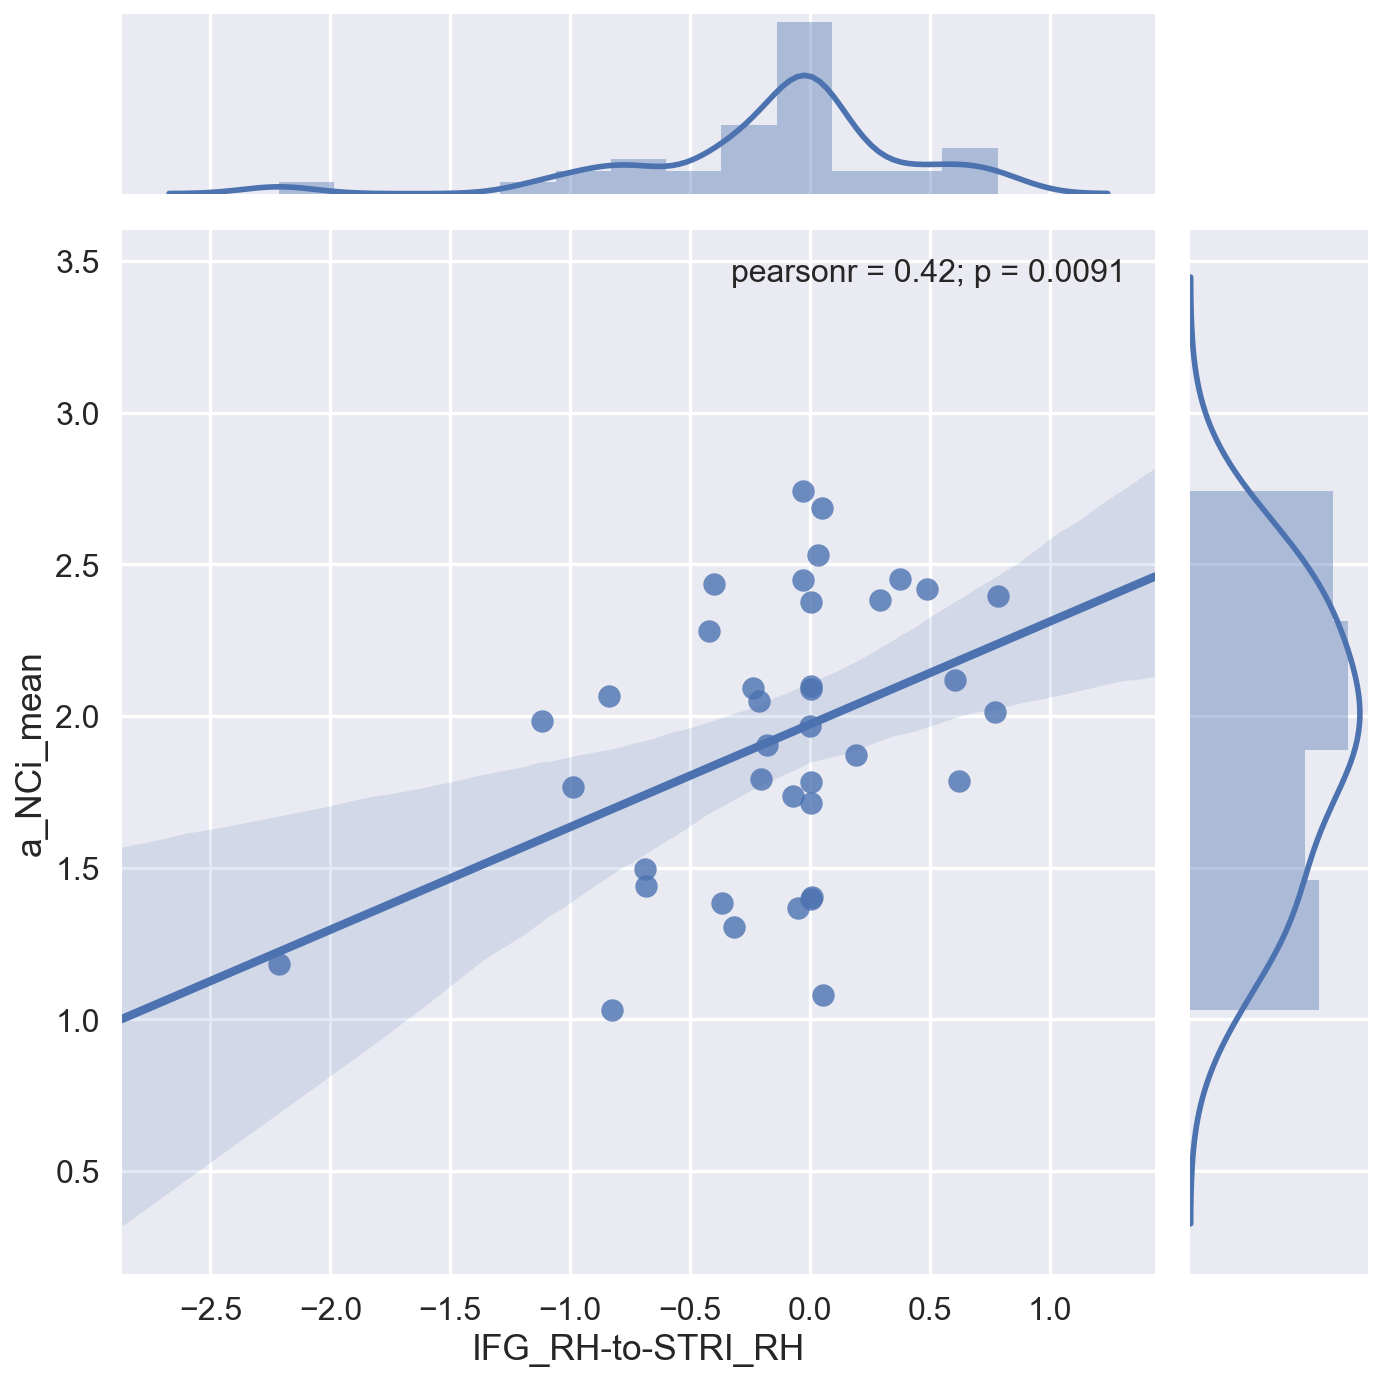

In [145]:
sns.jointplot(x='IFG_RH-to-STRI_RH', 
              y='a_NCi_mean', 
              data=a.merge(ddm), 
              kind='reg', 
              size=10);

#### Interim Summary:
Blah

<a id="10"></a>
### DCM Matrix D: Modulatory effects of drives on connections

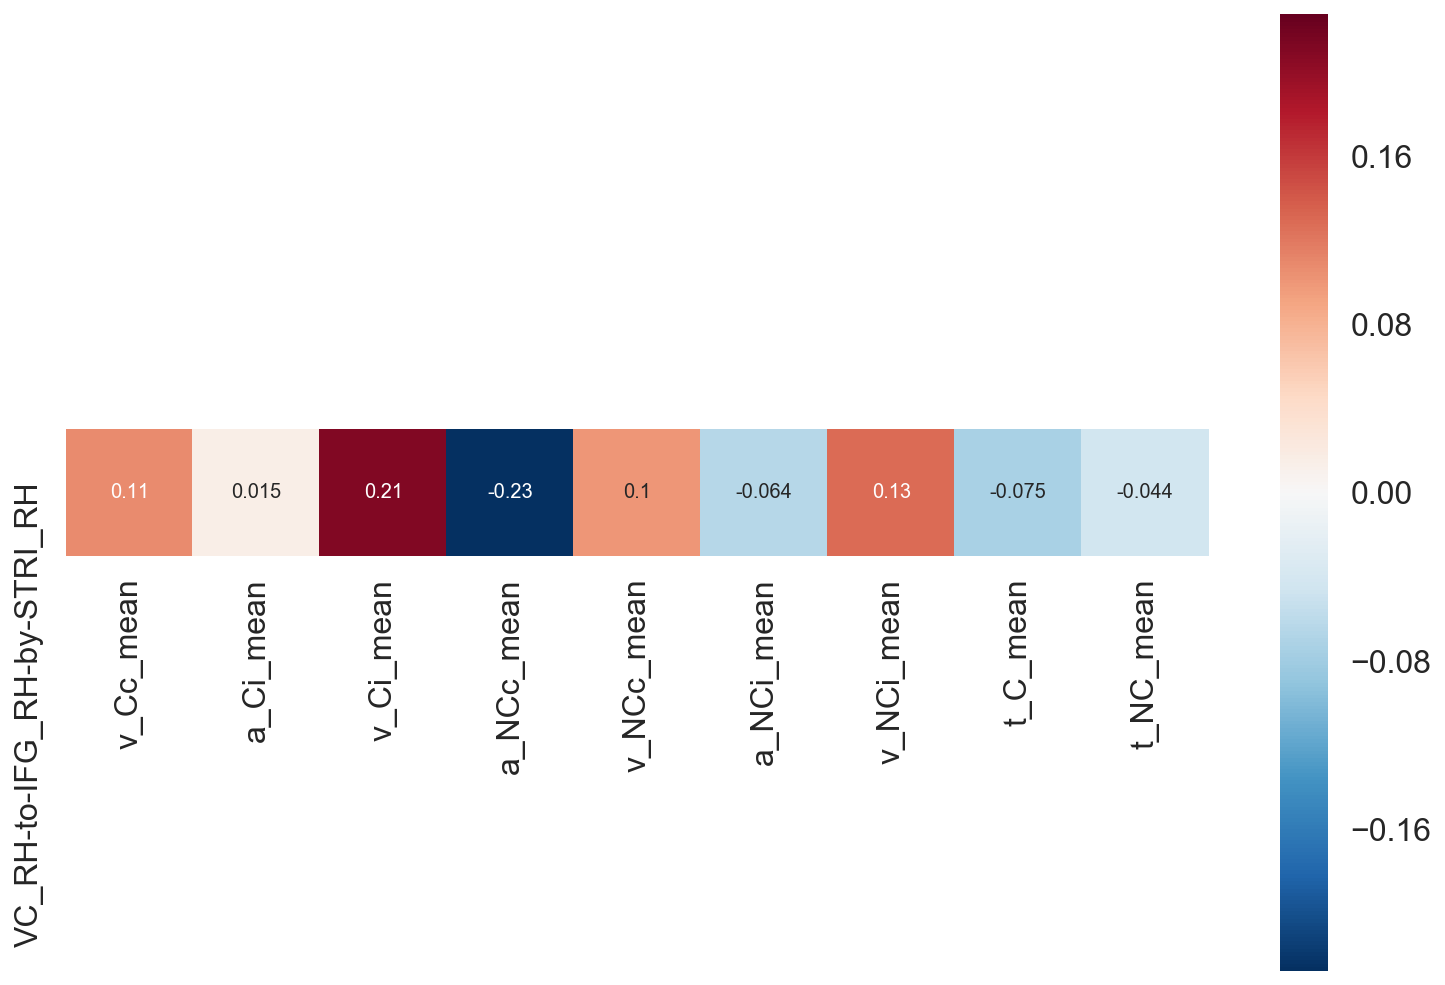

In [146]:
ax = sns.heatmap(d.merge(ddm).corr().iloc[1:2, 3:], 
                 annot=True, 
                 annot_kws={'size':10}, 
                 square=True)

In [165]:
df1 = d.merge(bx).iloc[:, 1:2]
df2 = d.merge(bx).iloc[:, 3:]

coeffmat = np.zeros((df1.shape[1], df2.shape[1]))
pvalmat = np.zeros((df1.shape[1], df2.shape[1]))

for i in range(df1.shape[1]):    
    for j in range(df2.shape[1]):        
        corrtest = pearsonr(df1[df1.columns[i]], df2[df2.columns[j]])  

        coeffmat[i,j] = corrtest[0]
        pvalmat[i,j] = corrtest[1]

dfCoeff = pd.DataFrame(coeffmat, columns=df2.columns, index=df1.columns)
dfPvals = pd.DataFrame(pvalmat, columns=df2.columns, index=df1.columns)

In [166]:
print('\nTable of Correlation Coefficients:')
dfCoeff

print('\nTable of p-values for Correlations:')
dfPvals


Table of Correlation Coefficients:


,CuedInc.ACC,CuedCon.RT,CuedCon.ACC,NCInc.RT,NCInc.ACC,NCCon.RT,NCCon.ACC,Overall.ACC,CuedEffect.RT,NCEffect.RT,CuedEffect.ACC,NCEffect.ACC
VC_RH-to-IFG_RH-by-STRI_RH,0.214966,-0.158471,0.109872,-0.147823,0.084223,-0.186926,-0.082817,0.118476,-0.017707,0.04965,-0.176105,-0.116572



Table of p-values for Correlations:


,CuedInc.ACC,CuedCon.RT,CuedCon.ACC,NCInc.RT,NCInc.ACC,NCCon.RT,NCCon.ACC,Overall.ACC,CuedEffect.RT,NCEffect.RT,CuedEffect.ACC,NCEffect.ACC
VC_RH-to-IFG_RH-by-STRI_RH,0.194946,0.341975,0.511397,0.375788,0.615147,0.261125,0.621082,0.478673,0.915969,0.767212,0.290231,0.485819


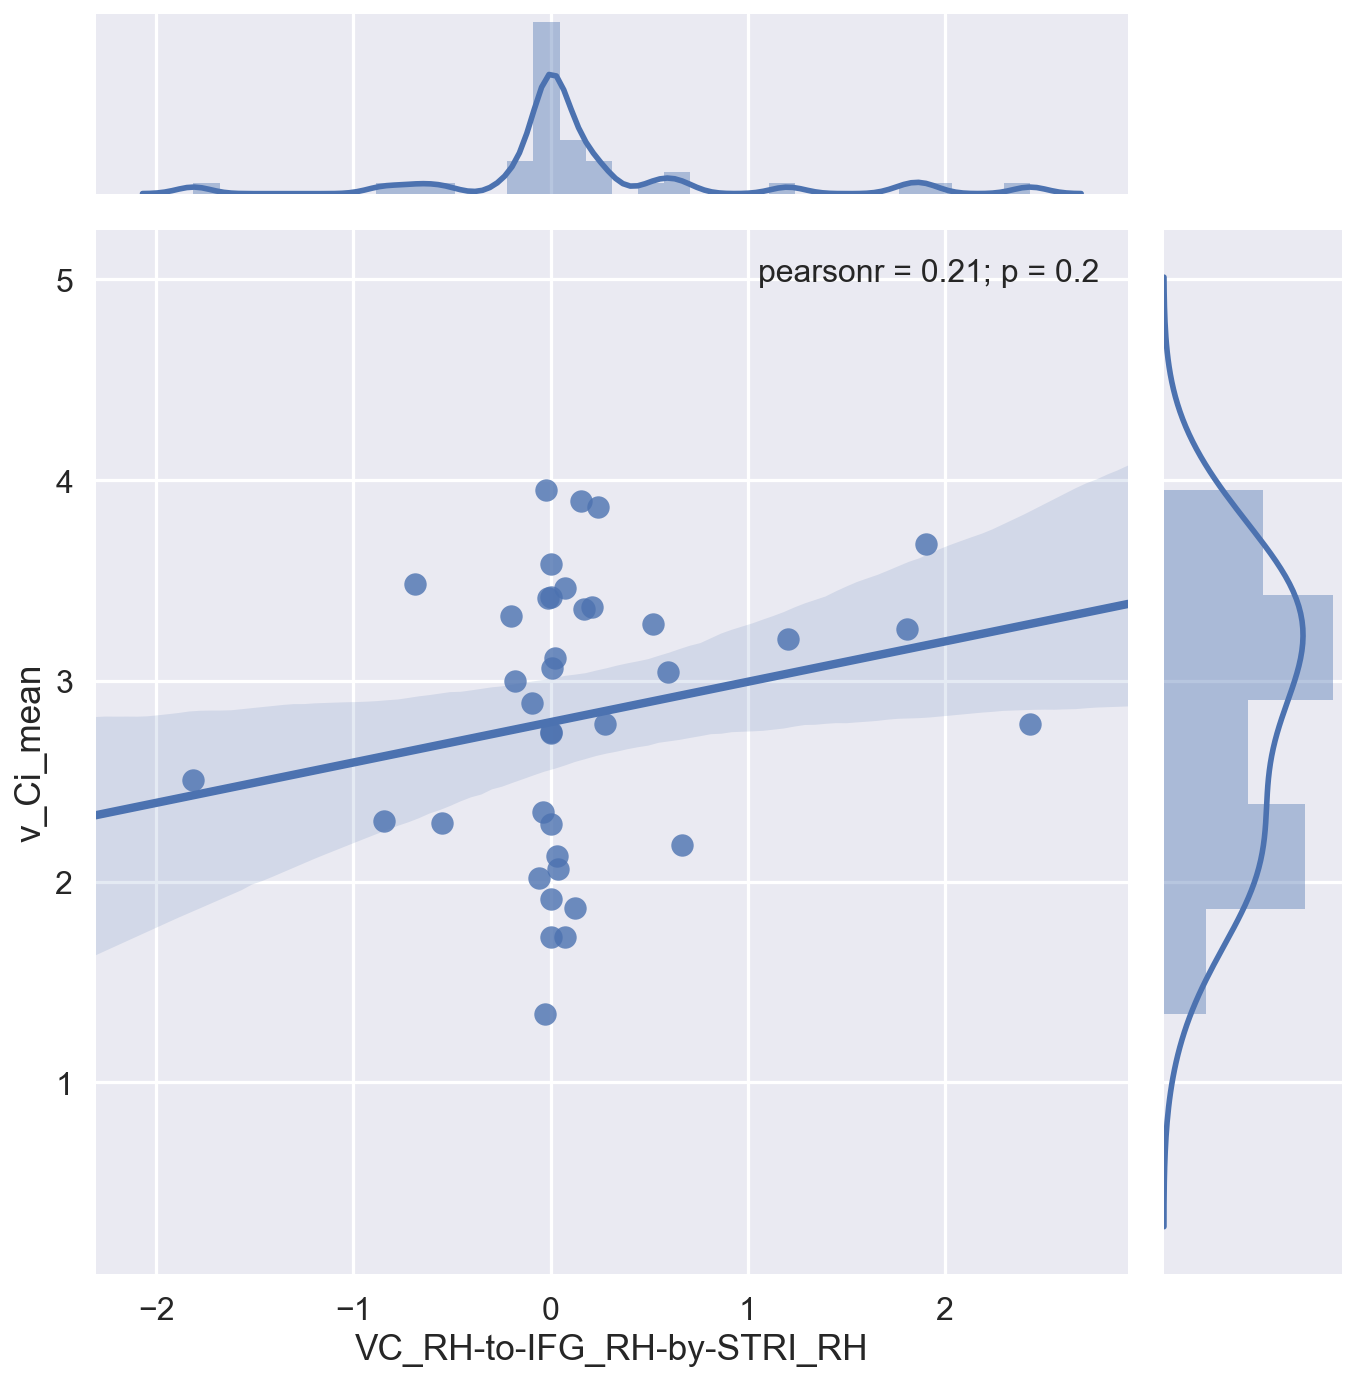

In [147]:
sns.jointplot(x='VC_RH-to-IFG_RH-by-STRI_RH', 
              y='v_Ci_mean', 
              data=d.merge(ddm), 
              kind='reg', 
              size=10);

#### Interim Summary:
Parameters reflecting modulatory effects of drives on connections did not significantly relate to any of the DDM paramters of interest. The signaling of the StN to the GPi during moments of conflict (incongruent arrows) was marginally related to the decision threshold during the proactive incongruent trials. This may suggest that the StN's signal, although traditionally associated with reactive control, may also be related to proactive controlled behavior via a modulation of the decision threshold.

Note that there may also be outliers in the DCM paramter estimates.

<a id="11"></a>
### DCM Matrix C: Effects of Drives on Regions

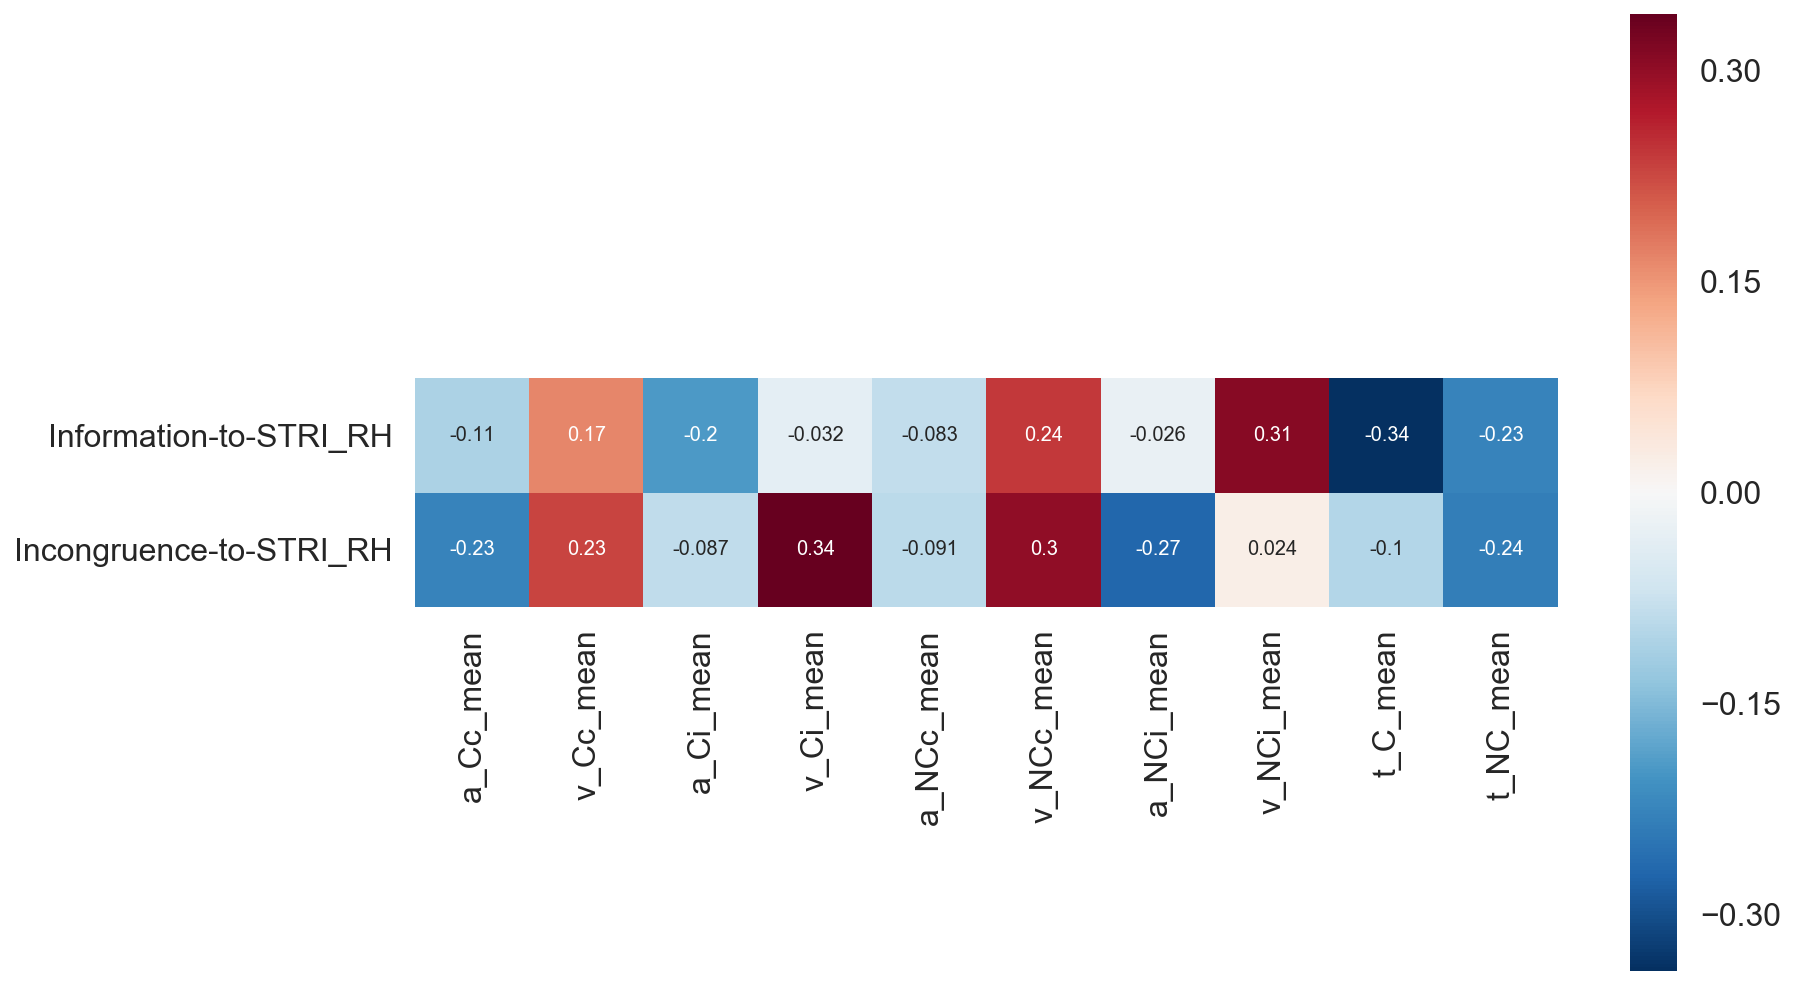

In [167]:
ax = sns.heatmap(c.merge(ddm).corr().iloc[3:5, 5:], 
                 annot=True, 
                 annot_kws={'size':10}, 
                 square=True)

In [168]:
df1 = c.merge(ddm).iloc[:, 3:5]
df2 = c.merge(ddm).iloc[:, 5:]

coeffmat = np.zeros((df1.shape[1], df2.shape[1]))
pvalmat = np.zeros((df1.shape[1], df2.shape[1]))

for i in range(df1.shape[1]):    
    for j in range(df2.shape[1]):        
        corrtest = pearsonr(df1[df1.columns[i]], df2[df2.columns[j]])  

        coeffmat[i,j] = corrtest[0]
        pvalmat[i,j] = corrtest[1]

dfCoeff = pd.DataFrame(coeffmat, columns=df2.columns, index=df1.columns)
dfPvals = pd.DataFrame(pvalmat, columns=df2.columns, index=df1.columns)

In [169]:
print('\nTable of Correlation Coefficients:')
dfCoeff

print('\nTable of p-values for Correlations:')
dfPvals


Table of Correlation Coefficients:


,a_Cc_mean,v_Cc_mean,a_Ci_mean,v_Ci_mean,a_NCc_mean,v_NCc_mean,a_NCi_mean,v_NCi_mean,t_C_mean,t_NC_mean
Information-to-STRI_RH,-0.106690,0.165143,-0.196155,-0.032115,-0.083088,0.240428,-0.026203,0.310525,-0.338677,-0.227221
Incongruence-to-STRI_RH,-0.227392,0.230221,-0.086587,0.340196,-0.090975,0.302467,-0.269969,0.023553,-0.099521,-0.235963



Table of p-values for Correlations:


,a_Cc_mean,v_Cc_mean,a_Ci_mean,v_Ci_mean,a_NCc_mean,v_NCc_mean,a_NCi_mean,v_NCi_mean,t_C_mean,t_NC_mean
Information-to-STRI_RH,0.523778,0.321771,0.237883,0.848209,0.619939,0.145943,0.875907,0.057766,0.037534,0.170089
Incongruence-to-STRI_RH,0.169760,0.164368,0.605225,0.036632,0.586991,0.064929,0.101170,0.888376,0.552194,0.153807


#### Interim Summary:
Blah

<a id="12"></a>
### DDM Section Summary: 
<div class="alert alert-block alert-info">
Blahblahblah, DDM, Blahblahblah
</div>